# 📊 Stack Overflow Developer Survey 2024 – Data Analysis

**Author**: Haidar Dagham  
**Date**: 2025  

This notebook performs data loading, cleaning, exploration, and visualization on a subset of the 2024 Stack Overflow Developer Survey. The goal is to identify trends in programming languages, databases, platforms, and developer demographics.


## Preparing and Explore the Dataset


## 📥 1. Data Loading

Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

## Load the dataset


Utilize the Pandas method read_csv() to load the data into a dataframe.


In [3]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
!wget {file_path}


#df = pd.read_csv('survey-data.csv')
df = pd.read_csv('survey-data-with-duplicate.csv')
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

--2025-05-19 17:42:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154822125 (148M) [text/csv]
Saving to: ‘survey-data-with-duplicate.csv’

survey-data-with-du 100%[===================>] 147.65M  42.3MB/s    in 4.1s    

2025-05-19 17:42:57 (36.0 MB/s) - ‘survey-data-with-duplicate.csv’ saved [154822125/154822125]



## Explore the dataset


Display the top 5 rows and columns from your dataset.


In [4]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

## 🧹 2. Data Cleaning & Preparation

## Find out the number of rows and columns


Print the number of rows in the dataset.


In [5]:
len(df)

65457

Print the number of columns in the dataset.


In [6]:
len(df.columns)

114

## Identify the data types of each column


In [7]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

## Find the mean age of the survey participants.


In [8]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [9]:
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan

    # Handle "Under X" cases > return > "15"
    if "Under" in age_str:
        return float(age_str.split()[1])-3

    # Handle exact numbers (e.g., "55 years old") > 55
    if age_str[0].isdigit() and "-" not in age_str and "older" not in age_str:
        return float(age_str.split()[0])

    # Handle ranges (e.g., "18-24 years old")
    if "-" in age_str:
        parts = age_str.split("-")
        lower = float(parts[0])  # "18"
        upper = float(parts[1].split()[0])  # "24" from "24 years old"
        return (lower + upper) / 2 # (18+24)/2

    # Handle "Over X" cases
    if "Over" in age_str:
        return float(age_str.split()[1])+4

    # Handle "65 years or older" cases
    if age_str[0].isdigit() and "-" not in age_str:
        return float(age_str.split()[0])+4

    return np.nan  # Fallback for unexpected formats

## 📊 3. Exploratory Data Analysis (EDA)

In [10]:
# Apply the function to the 'Age' column
df['Age_Midpoint'] = df['Age'].apply(age_to_midpoint)

In [11]:
print(df['Age_Midpoint'].unique())

[15.  39.5 49.5 21.  29.5 59.5  nan 69. ]


In [12]:
print(df['Age_Midpoint'].mean())

32.95629845705074


In [13]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2  

The dataset is the result of a world wide survey.

How many unique countries are there in the Country column.


In [14]:
len(df['Country'].unique())

186

### Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [15]:
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 20


In [16]:
# Display the first few duplicate rows
duplicate_rows.head()

ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   
65440                                                NaN   
65441                                                NaN   

                                                 EdLevel  \
65437                          Primary/elementary school   
65438       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
65439    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
65440  Some college/university study without earning ...   
65441  Secondary school (e.g. American high school, G...   

                                               LearnCode  \
65437                             Books / Physical media   
65438  Books / Physical media;Colleague;On the job tr...   
65439  Books / Physical media;Colleague;On the job tr...   
65440  Other online resources (e.g., videos, blogs, f...   
65441  Other online resources (e.g., videos, blogs, f...   

                                         LearnCodeOnline  \
65437                                                NaN   
65438  Technical documentation;Blogs;Books;Written Tu...   
65439  Technical documentation;Blogs;Books;Written Tu...   
65440  Stack Overflow;How-to videos;Interactive tutorial   
65441  Technical documentation;Blogs;Written Tutorial...   

                                                 TechDoc YearsCode  \
65437                                                NaN       NaN   
65438  API document(s) and/or SDK document(s);User gu...        20   
65439  API document(s) and/or SDK document(s);User gu...        37   
65440                                                NaN         4   
65441  API document(s) and/or SDK document(s);User gu...         9   

      YearsCodePro                DevType OrgSize PurchaseInfluence  \
65437          NaN                    NaN     NaN               NaN   
65438           17  Developer, full-stack     NaN               NaN   
65439           27   Developer Experience     NaN               NaN   
65440          NaN  Developer, full-stack     NaN               NaN   
65441          NaN  Developer, full-stack     NaN               NaN   

      BuyNewTool BuildvsBuy TechEndorse  \
65437        NaN        NaN         NaN   
65438        NaN        NaN         NaN   
65439        NaN        NaN         NaN   
65440        NaN        NaN         NaN   
65441        NaN        NaN         NaN   

                                                 Country Currency  CompTotal  \
65437                           United States of America      NaN        NaN   
65438  United Kingdom of Great Britain and Northern I...      NaN        NaN   
65439  United Kingdom of Great Britain and Northern I...      NaN        NaN   
65440                                             Canada      NaN        NaN   
65441                                             Norway      NaN        NaN   

                                  LanguageHaveWorkedWith  \
65437                                                NaN   
65438  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
65439                                                 C#   
6

Decide which columns are critical for defining uniqueness in the dataset.

## 📈 4. Visualizations & Insights

In [17]:
# Based on previous analysis, these columns seem important for uniqueness
critical_columns = ['ResponseId', 'MainBranch', 'Employment', 'RemoteWork', 'Age', 'Country']

Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.

In [18]:
# Remove duplicates keeping the first occurrence based on critical columns
df_clean = df.drop_duplicates(subset=critical_columns, keep='first')

# Verify removal
print(f"Original shape: {df.shape}")
print(f"After duplicate removal: {df_clean.shape}")
print(f"Number of duplicates removed: {len(df) - len(df_clean)}")

Original shape: (65457, 115)
After duplicate removal: (65437, 115)
Number of duplicates removed: 20


##### Identify missing values for all columns.


In [19]:
print(df.isnull().sum())

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10637
                       ...  
SurveyLength            9259
SurveyEase              9202
ConvertedCompYearly    42020
JobSat                 36326
Age_Midpoint             322
Length: 115, dtype: int64


##### Visualize missing values using a heatmap (Using seaborn library).



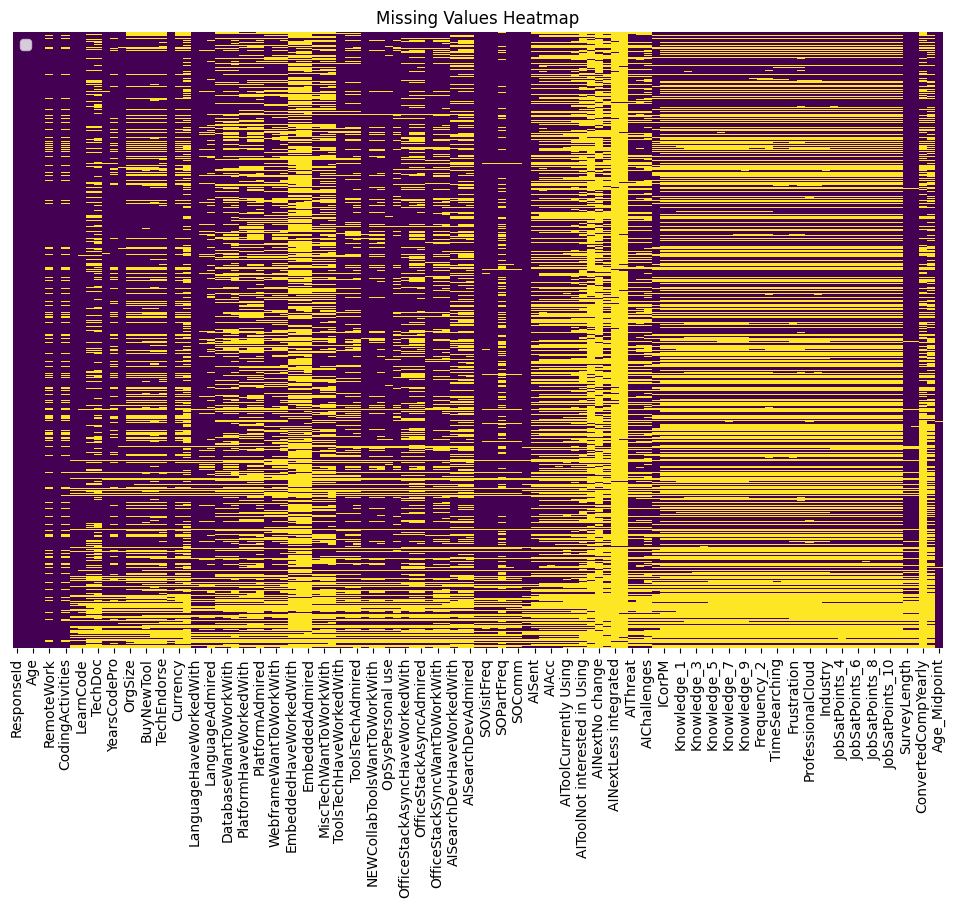

In [20]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.legend(labels=['False','True'],loc='upper left')
plt.show()

##### Count the number of missing rows for a specific column (e.g., `Employment`).


In [21]:
missing_employment_count = df['Employment'].isnull().sum()
print(f"Number of missing values in 'Employment' column: {missing_employment_count}")

Number of missing values in 'Employment' column: 0


#####  Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [22]:
# Identify the most frequent value in the 'Employment' column
most_frequent_employment = df['Employment'].mode()[0]
# .mode() returns a Series, [0] gets the first (most frequent) value

print(f"The most frequent value in 'Employment' column is: {most_frequent_employment}")

The most frequent value in 'Employment' column is: Employed, full-time


##### Impute missing values in the `Employment` column with the most frequent value.



In [23]:
# Impute missing values in the 'Employment' column with the most frequent value
df['Employment'] = df['Employment'].fillna(most_frequent_employment)

# Verify the imputation (optional)
print(df['Employment'].isnull().sum())

0


In [24]:
# Find the value counts for the 'RemoteWork' column.
remotework_counts = df['RemoteWork'].value_counts()
remotework_counts


RemoteWork
Hybrid (some remote, some in-person)    23018
Remote                                  20840
In-person                               10962
Name: count, dtype: int64

##### Identify the most frequent (majority) value in the RemoteWork column.



In [25]:
# Identify the most frequent value in the RemoteWork column.
majority_value = df['RemoteWork'].mode()[0]
print("Majority value in RemoteWork:", majority_value)

Majority value in RemoteWork: Hybrid (some remote, some in-person)


##### Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [26]:
# Impute missing values in 'RemoteWork' with the majority value.
df['RemoteWork']=df['RemoteWork'].fillna(majority_value)

# Verify the imputation (optional).
missing_remotework_after_imputation = df['RemoteWork'].isnull().sum()
print("Number of missing values in RemoteWork after imputation:", missing_remotework_after_imputation)


Number of missing values in RemoteWork after imputation: 0


##### Check for any compensation-related columns and describe their distribution.



In [27]:
# Identify compensation-related columns (assuming column names contain 'salary', 'compensation', 'pay', etc.)
compensation_columns = [col for col in df.columns if 'salary' in col.lower() or 'compensation' in col.lower() or 'pay' in col.lower()]

# Describe the distribution of compensation-related columns
if compensation_columns:
    for col in compensation_columns:
        print(f"\nDistribution of {col}:")
        print(df[col].describe())
else:
    print("No compensation-related columns found in the dataset.")


No compensation-related columns found in the dataset.


##### Impute missing values in CodingActivities with forward-fill.


In [28]:
df['CodingActivities']=df['CodingActivities'].fillna('ffill')
print(f"Number of missing values in 'CodingActivities' after forward fill: {df['CodingActivities'].isnull().sum()}")


Number of missing values in 'CodingActivities' after forward fill: 0


### Normalizing Compensation Data
##### Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [29]:
# Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.

compensation_column = 'ConvertedCompYearly'  # Identify the compensation column

# Check if the identified column exists in the DataFrame
if compensation_column in df.columns:
    print(f"Compensation column '{compensation_column}' found in the DataFrame.")
    # Proceed with normalization using the identified column
else:
    print(f"Compensation column '{compensation_column}' not found in the DataFrame.")

    # Example of finding a similar column (replace with more robust logic if needed)
    potential_compensation_columns = [col for col in df.columns if 'comp' in col.lower()]
    if potential_compensation_columns:
        print("Potential compensation columns:", potential_compensation_columns)
        compensation_column = potential_compensation_columns[0] # select the first one as a fallback
        print(f"Using '{compensation_column}' as the compensation column.")
    else:
        print("No suitable compensation column found.")
        compensation_column = None # or raise an error, depending on the requirements.


Compensation column 'ConvertedCompYearly' found in the DataFrame.


##### Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [30]:
# Check for missing values in 'ConvertedCompYearly' and handle them (e.g., fill with the median)
if compensation_column:
    if df[compensation_column].isnull().any():
        median_value = df[compensation_column].median()
        df[compensation_column]=df[compensation_column].fillna(median_value)

    # Perform Min-Max scaling
    min_comp = df[compensation_column].min()
    max_comp = df[compensation_column].max()
    df['ConvertedCompYearly_MinMax'] = (df[compensation_column] - min_comp) / (max_comp - min_comp)


##### Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [31]:
# Calculate Z-scores for 'ConvertedCompYearly'
if compensation_column:
    mean_comp = df[compensation_column].mean()
    std_comp = df[compensation_column].std()
    df['ConvertedCompYearly_Zscore'] = (df[compensation_column] - mean_comp) / std_comp


#### Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [32]:
# Create experience ranges
def categorize_experience(years):
    if pd.isnull(years) or years == 'Less than 1 year': # Handle 'Less than 1 year' as a special case
        return 'Unknown'
    try:
        years = int(years) # Attempt to convert to integer
    except ValueError: # Handle cases where conversion to integer fails
        return 'Unknown' # Assign 'Unknown' for these cases
    if years <= 5:
        return '0-5'
    elif years <= 10:
        return '5-10'
    elif years <= 20:
        return '10-20'
    else:
        return '>20'

df['ExperienceRange'] = df['YearsCodePro'].apply(categorize_experience)

In [33]:
# Calculate median JobSat for each range
experience_job_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().sort_index()

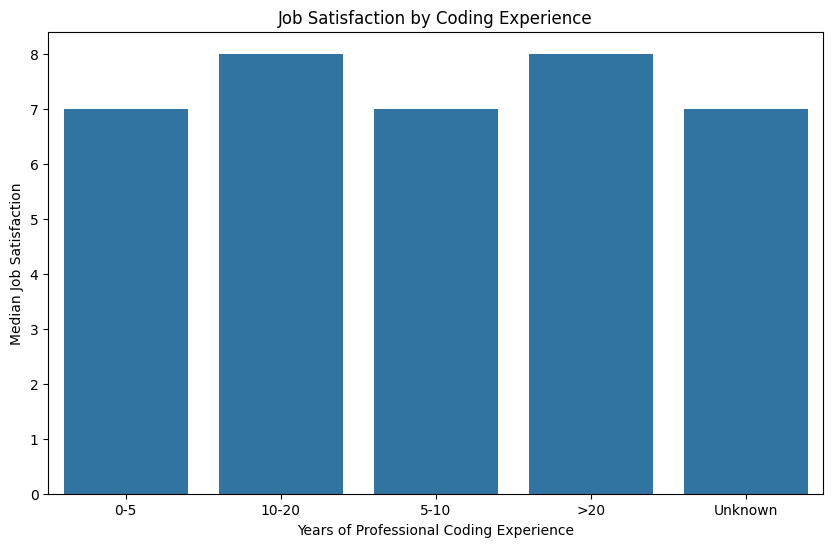

In [34]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=experience_job_satisfaction.index, y=experience_job_satisfaction.values)
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction by Coding Experience')
plt.show()

#### Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


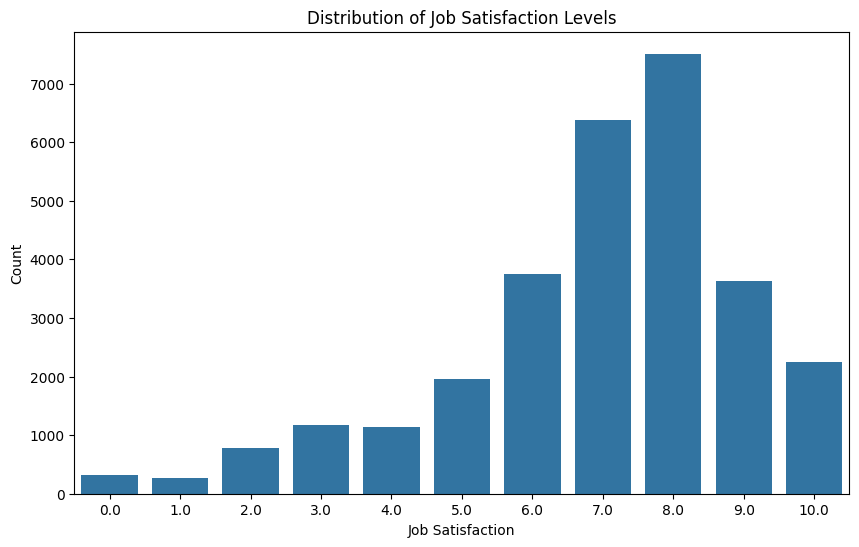

In [35]:
# Visualize the distribution of JobSat
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSat', data=df)
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Job Satisfaction Levels')
plt.show()


#### Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


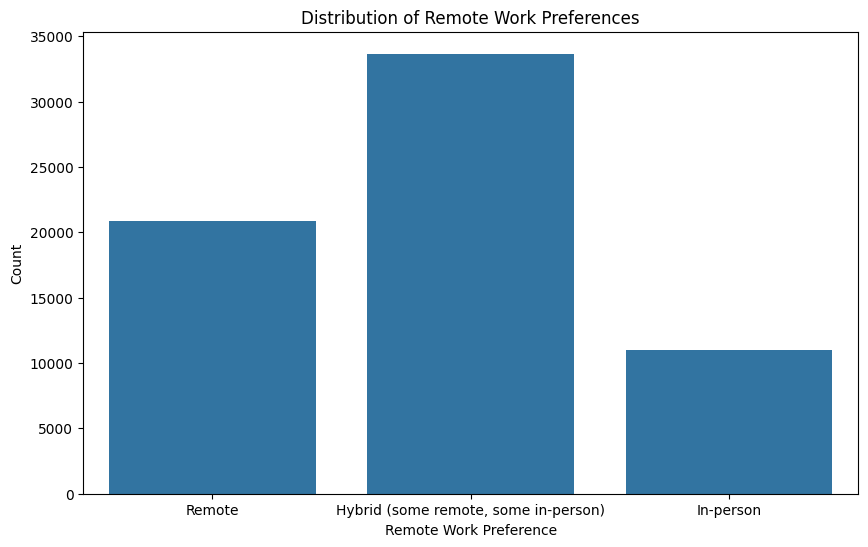

In [36]:
# Analyze remote work trends
plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df)
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.title('Distribution of Remote Work Preferences')
plt.show()

#### Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [37]:
# Analyze programming language trends by region
def analyze_language_trends(df, region):
    # Filter data for the specified region
    region_df = df[df['Country'] == region]

    # Check if the region exists in the data
    if region_df.empty:
        print(f"No data found for the region: {region}")
        return

    # Count occurrences of programming languages
    language_counts = {}
    for languages in region_df['LanguageHaveWorkedWith'].dropna(): # handle NaN values
        for lang in languages.split(';'): # Split the string of languages
            language_counts[lang] = language_counts.get(lang, 0) + 1

    # Sort by counts in descending order and select the top 10
    sorted_languages = dict(sorted(language_counts.items(), key=lambda item: item[1], reverse=True)[:10])

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_languages.keys(), sorted_languages.values())
    plt.xlabel('Programming Language')
    plt.ylabel('Number of Users')
    plt.title(f'Top 10 Programming Languages in {region}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

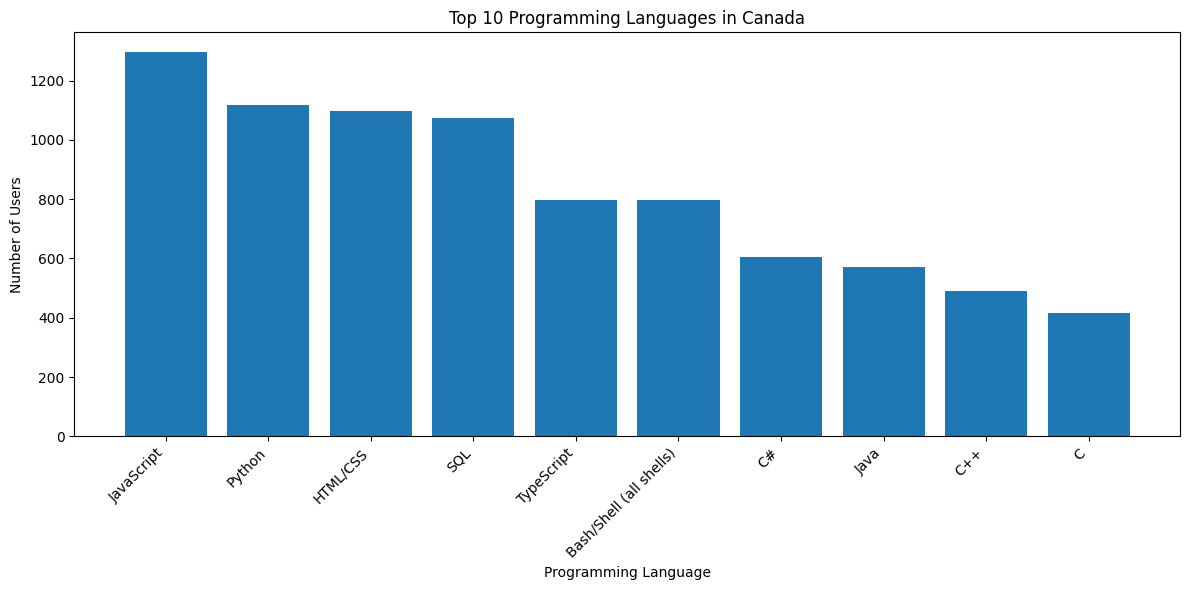

In [38]:
# Example usage (replace 'Canada' with the region you want to analyze)
analyze_language_trends(df, 'Canada')

### Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


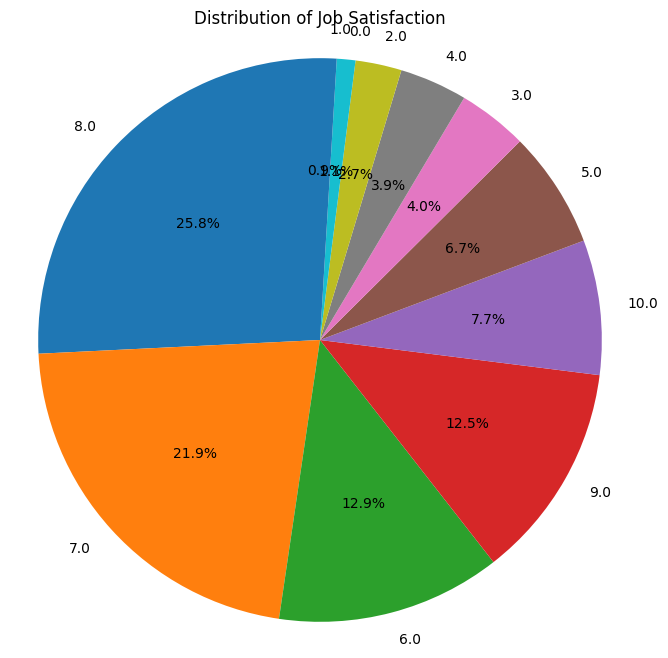

In [39]:
# Create a pie chart of Job Satisfaction
job_sat_counts = df['JobSat'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Job Satisfaction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-40-30420489e30f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['JobSat'], shade=True)


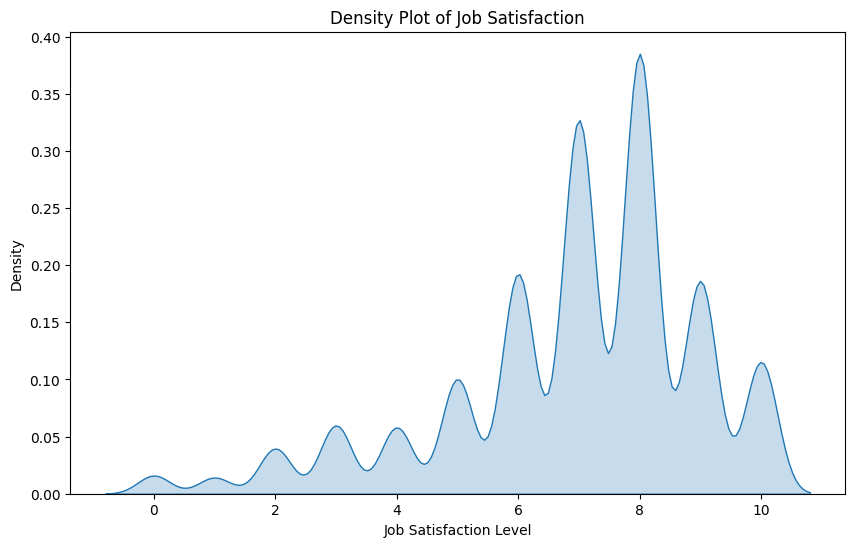

In [40]:
#Alternative visualization using KDE plot (Kernel Density Estimation)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['JobSat'], shade=True)
plt.title('Density Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Density')
plt.show()

### Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


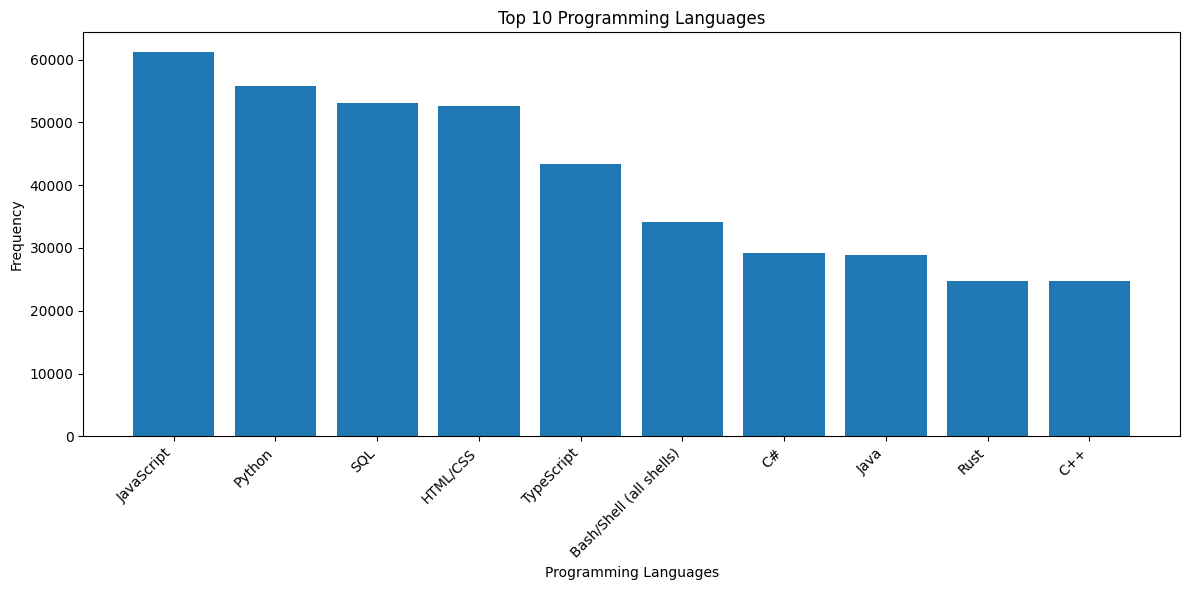

In [41]:
from collections import Counter

# Combine both columns into a single list
languages = []
for i in df['LanguageHaveWorkedWith']:
    if isinstance(i, str):
        languages.extend(i.split(';'))

for i in df['LanguageWantToWorkWith']:
    if isinstance(i, str):
        languages.extend(i.split(';'))

# Count the frequency of each language
language_counts = Counter(languages)

# Get the 10 most common languages
top_10_languages = language_counts.most_common(10)

# Extract languages and counts for plotting
top_languages, counts = zip(*top_10_languages)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_languages, counts)
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.title('Top 10 Programming Languages')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


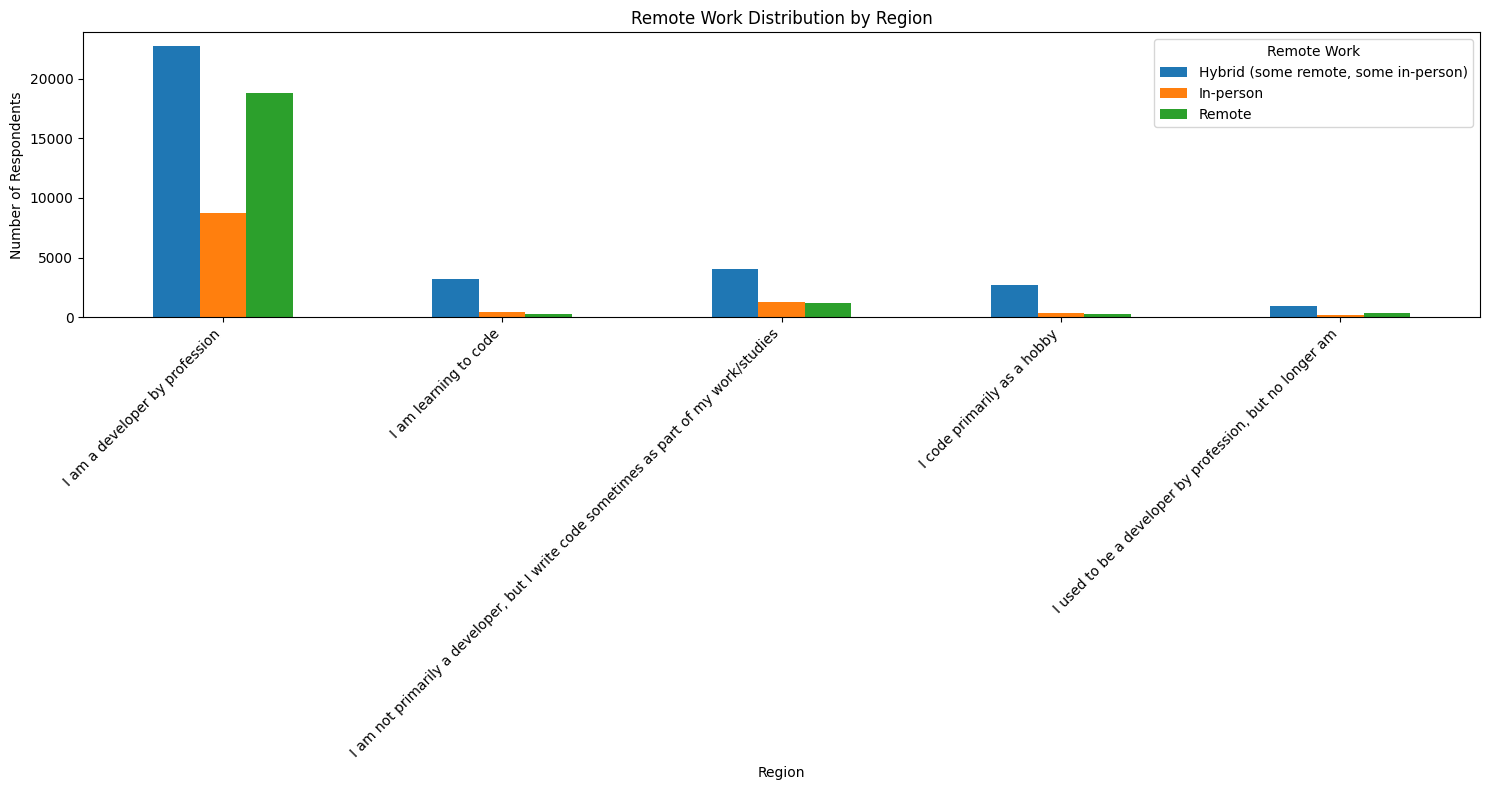

In [42]:
# based on the available columns in the dataset. Replace 'MainBranch' if necessary.
if 'Region' not in df.columns:
    if 'MainBranch' in df.columns:  # Assuming 'MainBranch' might represent region
        df.rename(columns={'MainBranch': 'Region'}, inplace=True)
    else:
        # Handle other possibilities or investigate your dataset further
        print("Error: 'Region' column not found. Please investigate your data.")

# Group data by 'Region' and 'RemoteWork' and count occurrences
remote_work_by_region = df.groupby(['Region', 'RemoteWork']).size().unstack()

# Create a grouped bar chart
remote_work_by_region.plot(kind='bar', figsize=(15, 8))
plt.title('Remote Work Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work')
plt.tight_layout()
plt.show()

# **Finding Outliers**


<h3> Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


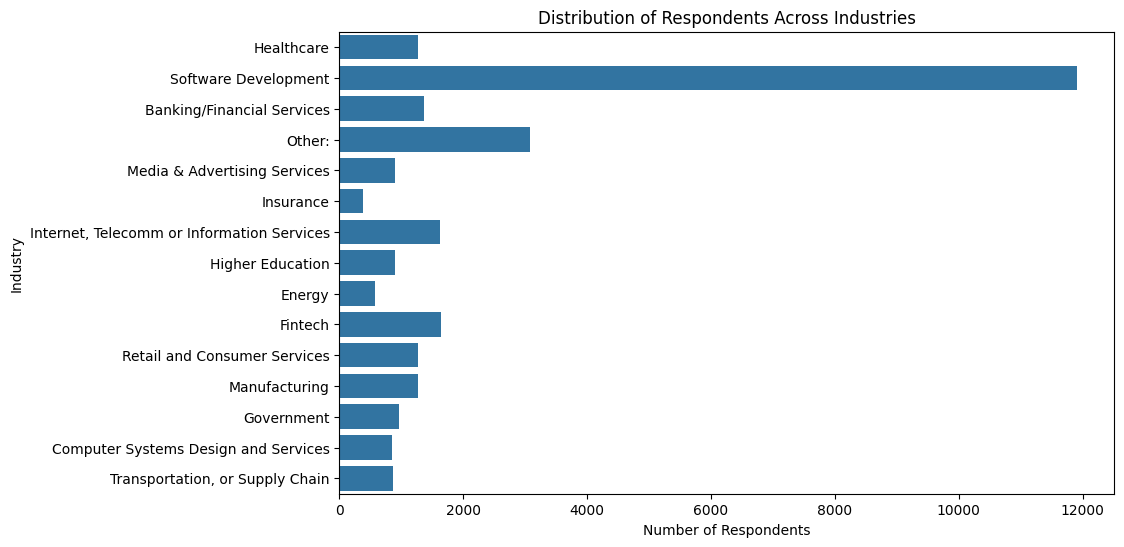

In [43]:
# prompt: do as asked in step 2

# Plot the distribution of the 'Industry' column
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.countplot(y='Industry', data=df) # Use 'y' for vertical orientation
plt.title('Distribution of Respondents Across Industries')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.show()


<h3> Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [44]:
# Calculate mean, median, and standard deviation for 'ConvertedCompYearly'
mean_compensation = df['ConvertedCompYearly'].mean()
median_compensation = df['ConvertedCompYearly'].median()
std_compensation = df['ConvertedCompYearly'].std()

# Define a threshold for outlier identification (e.g., 3 standard deviations above the mean)
threshold = mean_compensation + 3 * std_compensation

# Identify outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

# Display the outliers
print("High Compensation Outliers:")
print(outliers[['ResponseId','ConvertedCompYearly']]) # Display ResponseId and ConvertedCompYearly columns

# Optional: Remove outliers from the DataFrame (if needed for further analysis)
# df_no_outliers = df[df['ConvertedCompYearly'] <= threshold]

High Compensation Outliers:
       ResponseId  ConvertedCompYearly
529           530             650000.0
594           595             432000.0
828           829            1000000.0
920           921             500000.0
1081         1082             500000.0
...           ...                  ...
40188       40189             429429.0
40288       40289             438767.0
40373       40374             644437.0
40952       40953             750000.0
41027       41028             700000.0

[194 rows x 2 columns]


In [45]:
median_compensation

65000.0

<h3> Detect and remove Outliers </h3>


Identify outliers in the `JobSatPoints_1` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers (IQR method): 2141


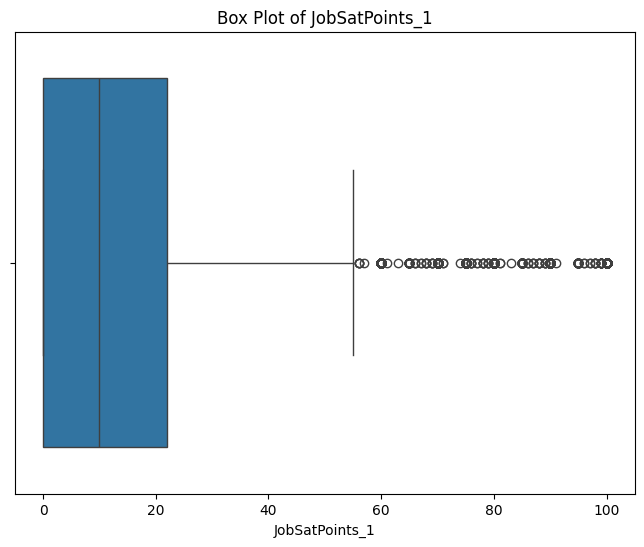

In [46]:
# Calculate Q1, Q3, and IQR
Q1 = df['JobSatPoints_1'].quantile(0.2)
Q3 = df['JobSatPoints_1'].quantile(0.8)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['JobSatPoints_1'] < lower_bound) | (df['JobSatPoints_1'] > upper_bound)]

# Count the number of outliers
num_outliers_iqr = len(outliers_iqr)
print(f"Number of outliers (IQR method): {num_outliers_iqr}")

# Visualize outliers using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='JobSatPoints_1', data=df)
plt.title('Box Plot of JobSatPoints_1')
plt.show()


<h3>Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Original number of rows: 65457
Number of rows after removing age outliers: 64362
Number of age outliers removed: 1095


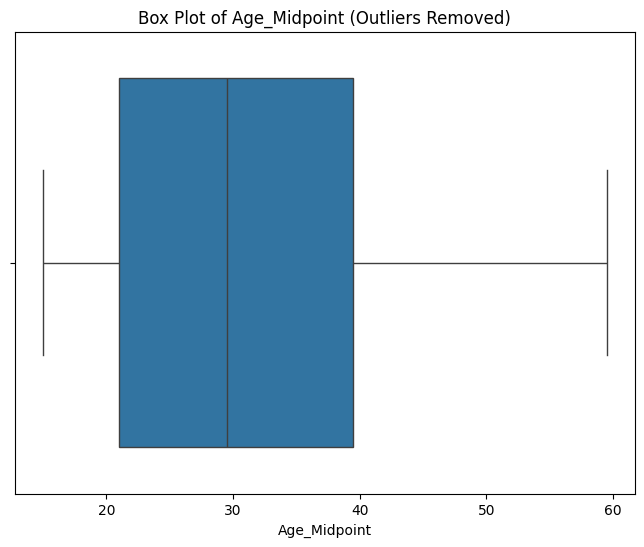

In [47]:
# prompt: make the df_no_outliers_iqr dataframe which exclude age outliers

# Assuming 'Age_Midpoint' is the numerical representation of 'Age' created earlier
# If not, re-run the age_to_midpoint function and apply it.
# df['Age_Midpoint'] = df['Age'].apply(age_to_midpoint)

# Calculate Q1, Q3, and IQR for Age_Midpoint
Q1_age = df['Age_Midpoint'].quantile(0.25)
Q3_age = df['Age_Midpoint'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define upper and lower bounds for outliers in Age_Midpoint
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Create the new dataframe excluding age outliers
df_no_outliers_iqr = df[(df['Age_Midpoint'] >= lower_bound_age) & (df['Age_Midpoint'] <= upper_bound_age)].copy()

# Verify the number of rows removed
print(f"Original number of rows: {len(df)}")
print(f"Number of rows after removing age outliers: {len(df_no_outliers_iqr)}")
print(f"Number of age outliers removed: {len(df) - len(df_no_outliers_iqr)}")

# Optionally, visualize the distribution of Age_Midpoint after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Midpoint', data=df_no_outliers_iqr)
plt.title('Box Plot of Age_Midpoint (Outliers Removed)')
plt.show()

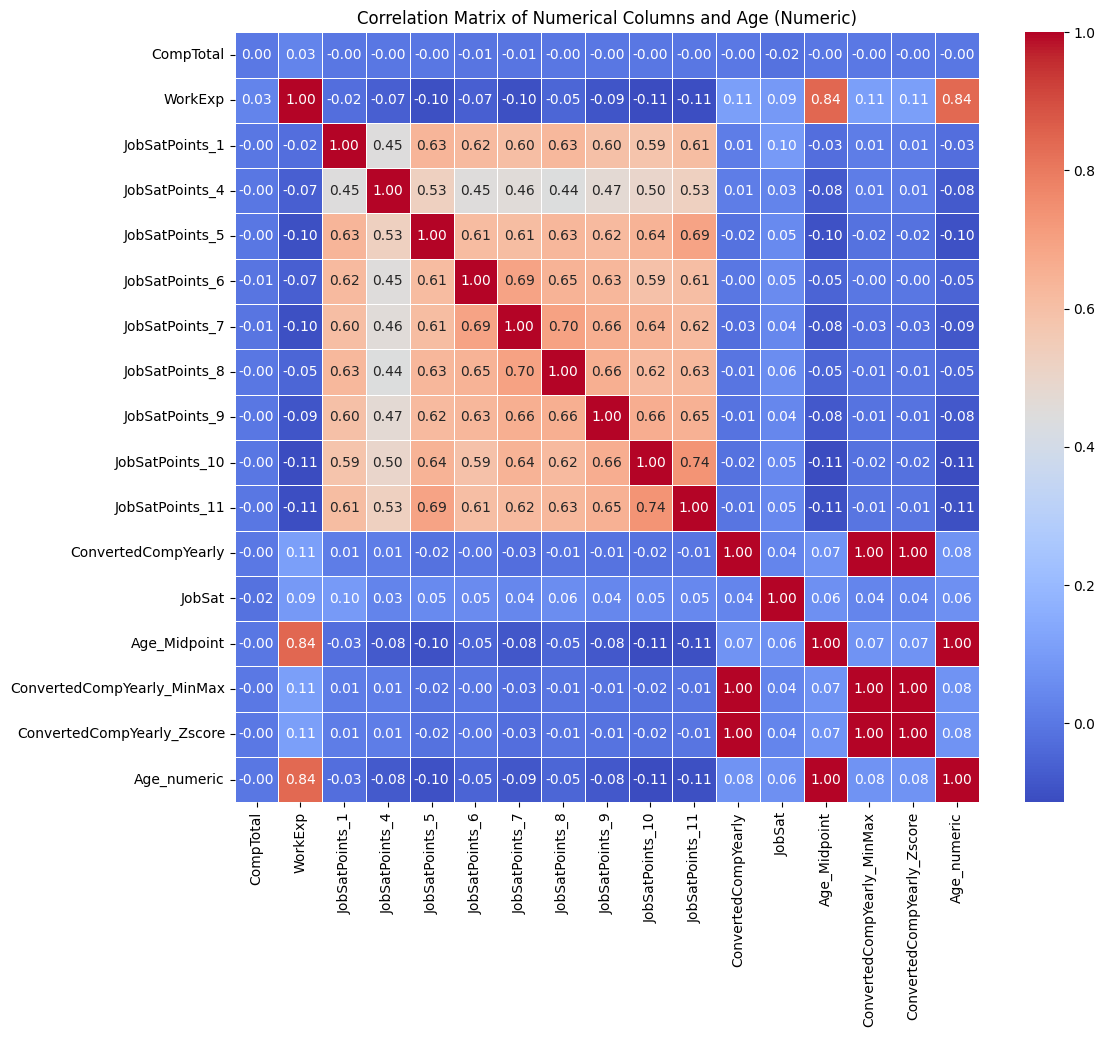

In [48]:

# Create a mapping for age ranges to approximate numerical values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

# Map the 'Age' column to the approximate numerical values
df_no_outliers_iqr['Age_numeric'] = df_no_outliers_iqr['Age'].map(age_mapping)

# Select numerical columns for correlation analysis (excluding 'ResponseId' and other non-numeric)
numerical_cols = df_no_outliers_iqr.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols.drop('ResponseId') # Assuming ResponseId is not relevant

correlation_matrix = df_no_outliers_iqr[numerical_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns and Age (Numeric)')
plt.show()

#### Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [49]:
# prompt: save the df as survey_data.csv and replace the current file

df.to_csv('survey_data.csv', index=False)

# **Querying and Data Visualization**


**Create a SQLite Database and Insert the Data**

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [50]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
df_check


ResponseId                          Region                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment                            RemoteWork   Check  \
0  Employed, full-time                                Remote  Apples   
1  Employed, full-time                                Remote  Apples   
2  Employed, full-time                                Remote  Apples   
3   Student, full-time  Hybrid (some remote, some in-person)  Apples   
4   Student, full-time  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                              ffill   
4                                              ffill   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                               None   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                               None      None         None   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                               None         4         None   
4  API document(s) and/or SDK document(s);User gu...         9         None   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                   None    None              None       None       None   
1  Developer, full-stack    None              None       None       None   
2   Developer Experience    None              None       None       None   
3  Developer, full-stack    None              None       None       None   
4  Developer, full-stack    None              None       None       None   

  TechEndorse                                            Country Currency  \
0        None                           United States of America     None   
1        None  United Kingdom of Great Britain and Northern I...     None   
2        None  United Kingdom of Great Britain and Northern I...     None   
3        None                                             Canada     None   
4        None                                             Norway     None   

  CompTotal                             LanguageHaveWorkedWith  \
0      None                                               None   
1      None  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2      None                                                 C#   
3      None  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4      None            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

               

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [51]:
QUERY = """
SELECT COUNT(*)
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


COUNT(*)
0     65457

## Demo: Listing All Tables


To view the names of all tables in the database:


In [52]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [53]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


Age  count
0     18-24 years old  14105
1     25-34 years old  23913
2     35-44 years old  14948
3     45-54 years old   6251
4     55-64 years old   2575
5   65 years or older    773
6   Prefer not to say    322
7  Under 18 years old   2570

## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [54]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "Region" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,
  "M

### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [55]:
QUERY = """
SELECT CompTotal
FROM main
"""
df_comptotal = pd.read_sql_query(QUERY, conn)
df_comptotal=df_comptotal.dropna()
df_comptotal.head(5)

CompTotal
72   2040000.0
374    28000.0
379    85000.0
385    50000.0
389   110000.0

In [56]:
q1=df_comptotal['CompTotal'].quantile(0.1)
q3=df_comptotal['CompTotal'].quantile(0.9)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df_comptotal=df_comptotal[(df_comptotal['CompTotal']>=lower_bound) & (df_comptotal['CompTotal']<=upper_bound)]


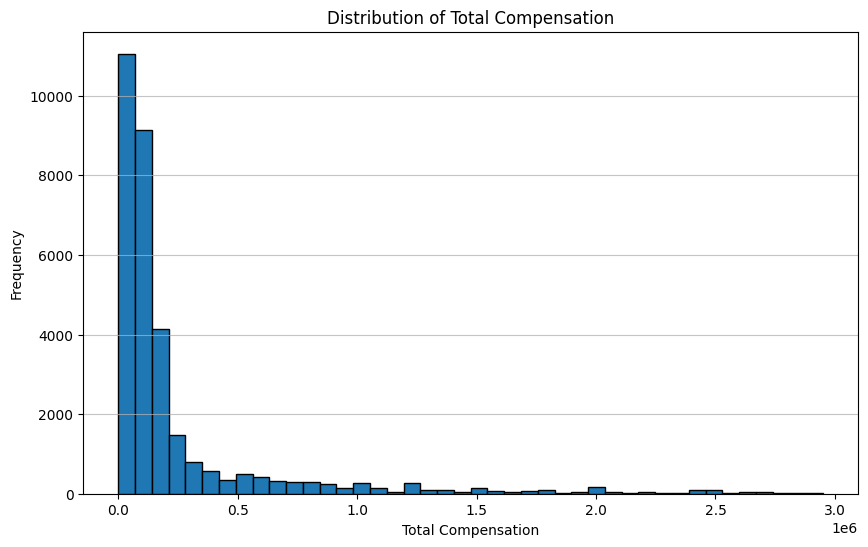

In [57]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comptotal['CompTotal'], bins=42, edgecolor='black')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Box Plots**

Plot a box plot of Age.


In [58]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
df_age=df_age.dropna()
df_age.head(5)

Age  count
0  18-24 years old  14105
1  25-34 years old  23913
2  35-44 years old  14948
3  45-54 years old   6251
4  55-64 years old   2575

<ipython-input-59-5aad6955abed>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df_age['count'], labels=['Age'])


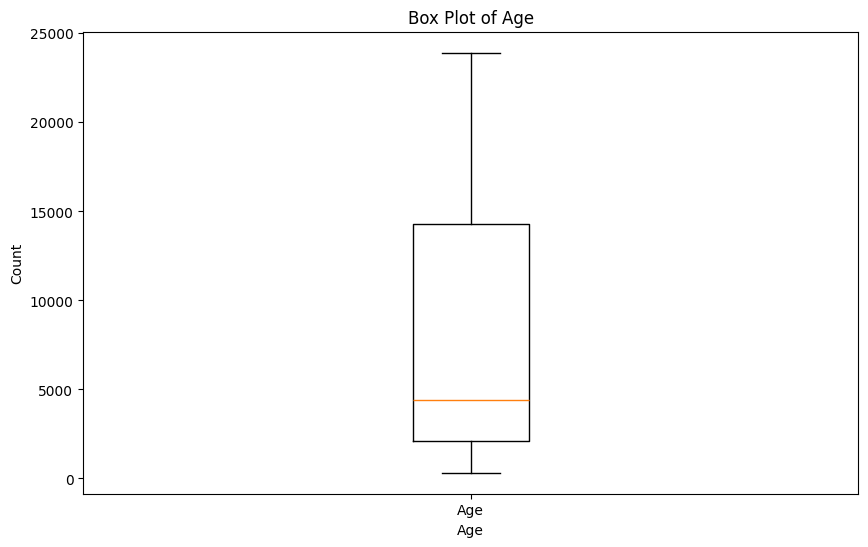

In [59]:
plt.figure(figsize=(10, 6))
# Changed code: providing a single label for the boxplot instead of a list
plt.boxplot(df_age['count'], labels=['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Box Plot of Age')
# plt.xticks(rotation=45, ha='right')  # Rotation is not needed for a single label
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


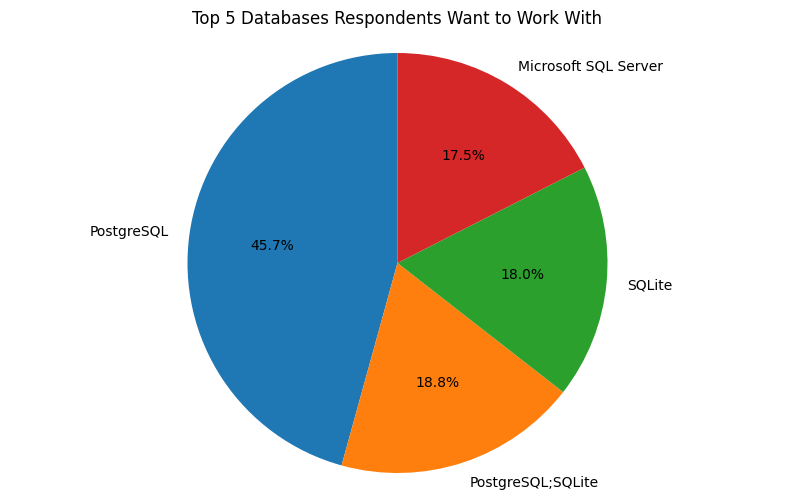

In [60]:
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 5
"""

df_databases = pd.read_sql_query(QUERY, conn)
df_databases = df_databases.dropna()

plt.figure(figsize=(10, 6))
plt.pie(df_databases['count'], labels=df_databases['DatabaseWantToWorkWith'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


<ipython-input-61-3bb59831ab65>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comptotal_age['Age_int'] = df_comptotal_age['Age_Midpoint'].round().astype(int)


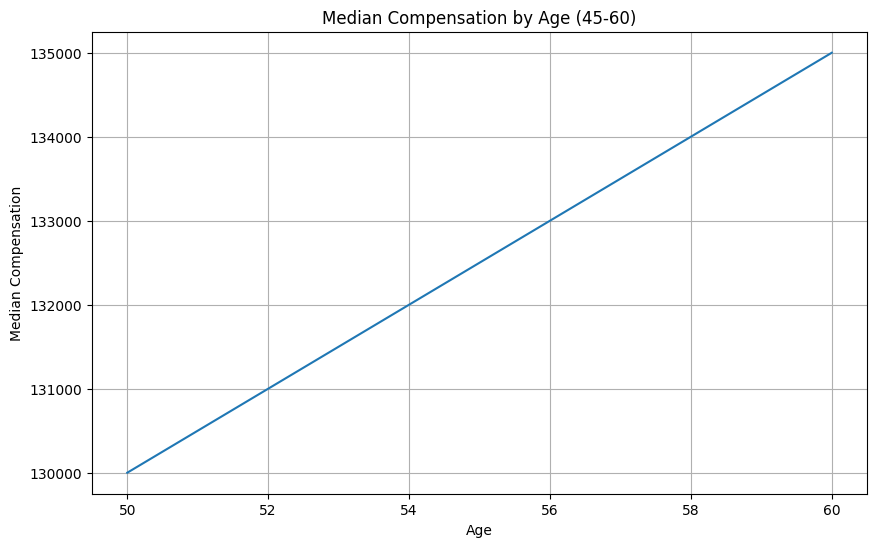

In [61]:
QUERY = """
SELECT CompTotal, Age
FROM main
"""
df_comptotal_age = pd.read_sql_query(QUERY, conn)
df_comptotal_age = df_comptotal_age.dropna()
df_comptotal_age['Age_Midpoint'] = df_comptotal_age['Age'].apply(age_to_midpoint)
df_comptotal_age = df_comptotal_age.dropna(subset=['Age_Midpoint'])
df_comptotal_age['Age_int'] = df_comptotal_age['Age_Midpoint'].round().astype(int)
df_comptotal_age = df_comptotal_age[(df_comptotal_age['Age_int'] >= 45) & (df_comptotal_age['Age_int'] <= 60)]

# Calculate the median CompTotal for each age group
median_comptotal_by_age = df_comptotal_age.groupby('Age_int')['CompTotal'].median()


plt.figure(figsize=(10, 6))
plt.plot(median_comptotal_by_age.index, median_comptotal_by_age.values)
plt.xlabel('Age')
plt.ylabel('Median Compensation')
plt.title('Median Compensation by Age (45-60)')
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


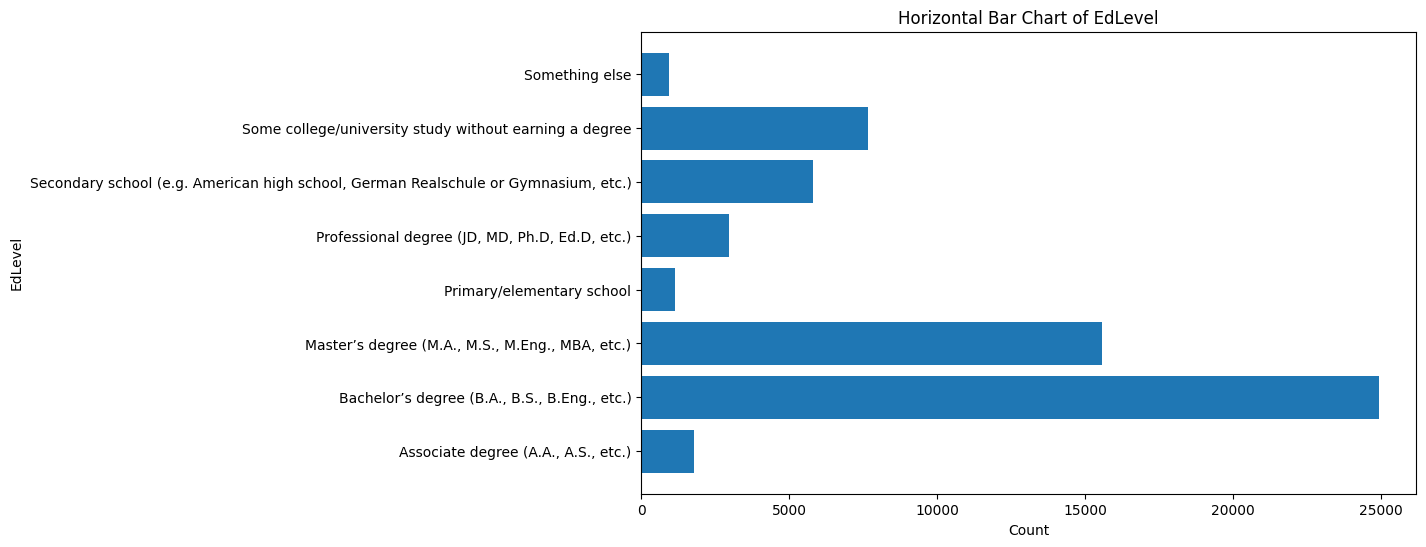

In [62]:
QUERY = """
SELECT EdLevel, COUNT(*) AS count
FROM main
GROUP BY EdLevel
"""

df_EdLevel = pd.read_sql_query(QUERY, conn)
df_EdLevel = df_EdLevel.dropna()

plt.figure(figsize=(10, 6))
plt.barh(df_EdLevel['EdLevel'], df_EdLevel['count'])
plt.xlabel('Count')
plt.ylabel('EdLevel')
plt.title('Horizontal Bar Chart of EdLevel')
plt.show()


# **Histogram**


### Visualizing the distribution of data (Histograms)


**Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


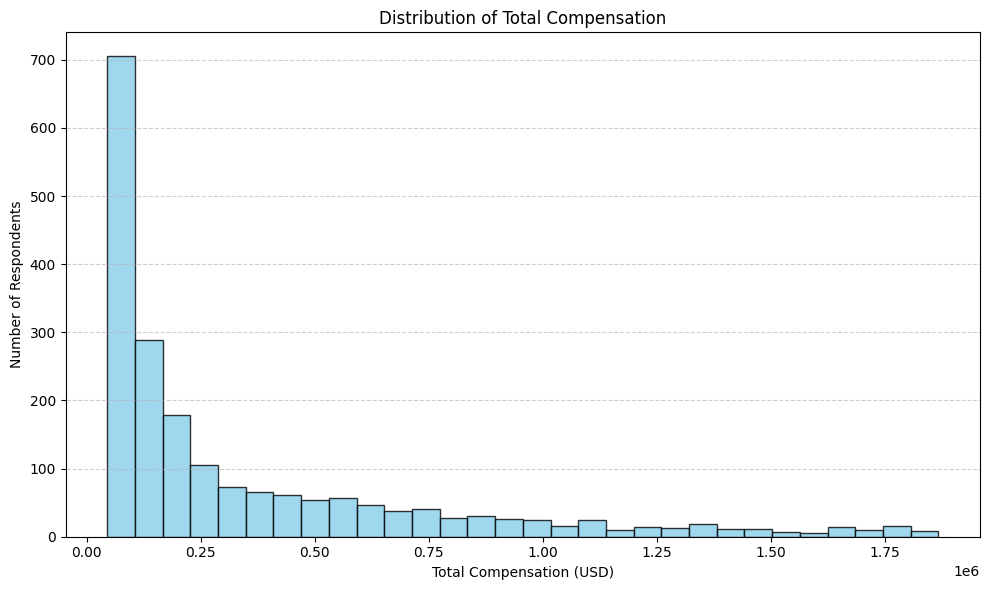

In [63]:
QUERY = """
SELECT CompTotal, COUNT(*) AS count
FROM main
GROUP BY CompTotal
"""

df = pd.read_sql_query(QUERY, conn)
df = df.dropna()


# Step 1: Convert CompTotal to numeric and drop nulls
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

# Step 2: Remove outliers (bottom 1% and top 1%)
lower = df["CompTotal"].quantile(0.2)
upper = df["CompTotal"].quantile(0.8)
df = df[(df["CompTotal"] >= lower) & (df["CompTotal"] <= upper)]

# Step 3: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df["CompTotal"], bins=30, color="skyblue", edgecolor="black", alpha=0.8)
plt.xlabel("Total Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Total Compensation")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


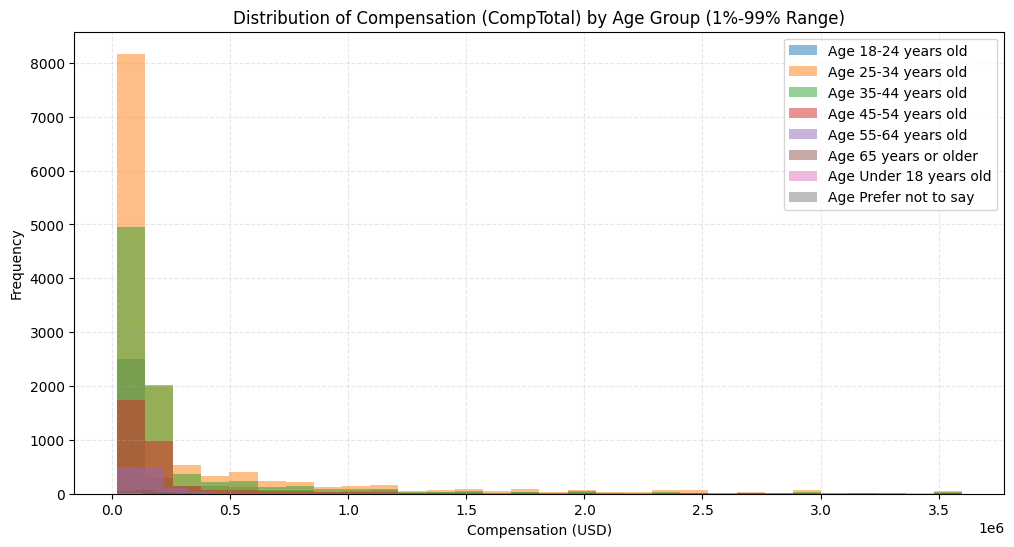

In [64]:
query = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric and drop missing/invalid entries
#df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal", "Age"])

# Remove top 1% and bottom 1% outliers
lower_bound = df["CompTotal"].quantile(0.05)
upper_bound = df["CompTotal"].quantile(0.95)
df = df[(df["CompTotal"] >= lower_bound) & (df["CompTotal"] <= upper_bound)]

# Clean Age strings (optional but recommended)
df["Age"] = df["Age"].astype(str).str.strip()

# Plotting
plt.figure(figsize=(12, 6))
age_groups = df["Age"].unique()

for age in age_groups:
    age_group_data = df[df["Age"] == age]["CompTotal"]
    if not age_group_data.empty:
        plt.hist(
            age_group_data,
            bins=30,
            alpha=0.5,
            label=f"Age {age}"
        )

plt.title("Distribution of Compensation (CompTotal) by Age Group (1%-99% Range)")
plt.xlabel("Compensation (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


**Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


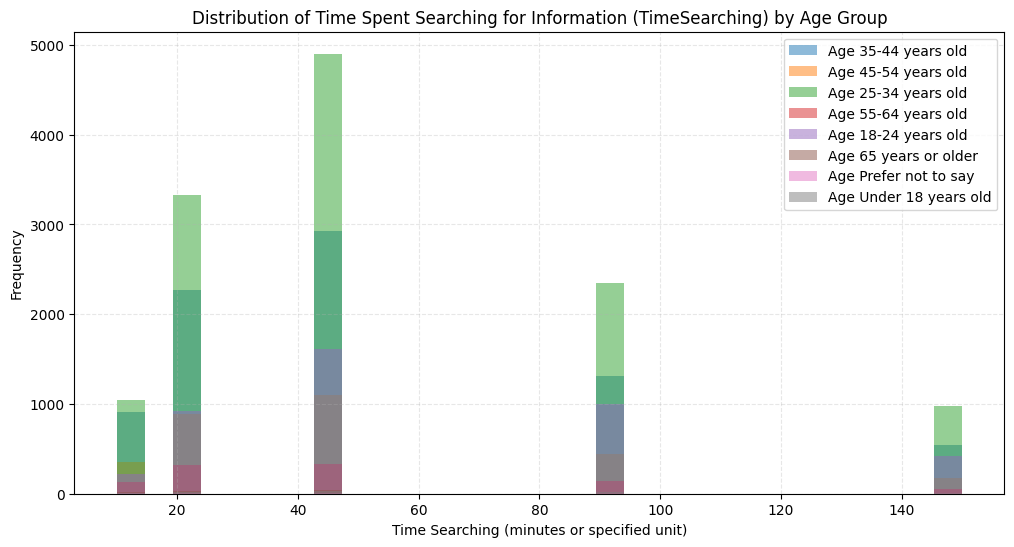

In [65]:
query = """
SELECT Age, TimeSearching
FROM main
"""
df = pd.read_sql_query(query, conn)
df = df.dropna(subset=["TimeSearching", "Age"])
# Define the mapping dictionary
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150,
    None: None
}

# Map the TimeSearching column
df["TimeSearching"] = df["TimeSearching"].map(time_mapping)

# Drop rows with missing or unmapped values (optional)
df = df.dropna(subset=["TimeSearching"])

# Ensure it's integer (optional)
df["TimeSearching"] = df["TimeSearching"].astype(int)
df["TimeSearching"].unique()


# Convert TimeSearching to numeric and clean the data
df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")


# Optional: Remove outliers (e.g., top and bottom 1%)
lower_bound = df["TimeSearching"].quantile(0.02)
upper_bound = df["TimeSearching"].quantile(0.98)
df = df[(df["TimeSearching"] >= lower_bound) & (df["TimeSearching"] <= upper_bound)]

# Clean Age values
df["Age"] = df["Age"].astype(str).str.strip()
age_groups = df["Age"].unique()

# Plotting histograms
plt.figure(figsize=(12, 6))
for age in age_groups:
    age_data = df[df["Age"] == age]["TimeSearching"]
    if not age_data.empty:
        plt.hist(
            age_data,
            bins=30,
            alpha=0.5,
            label=f"Age {age}"
        )

plt.title("Distribution of Time Spent Searching for Information (TimeSearching) by Age Group")
plt.xlabel("Time Searching (minutes or specified unit)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


### Visualizing the Composition of Data


** Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


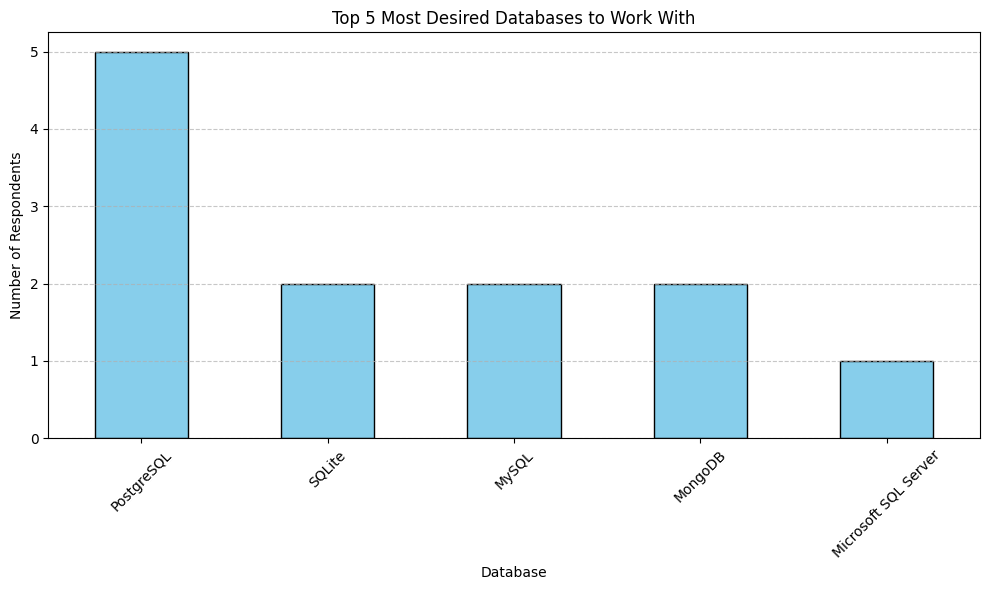

In [66]:
query = """
SELECT DatabaseWantToWorkWith, COUNT(*) AS count
FROM main
GROUP BY DatabaseWantToWorkWith
ORDER BY count DESC
LIMIT 10;
"""

df = pd.read_sql_query(query, conn)
df

# Step 2: Split multiple selections and flatten the list
all_databases = df["DatabaseWantToWorkWith"].str.split(";")
flattened = all_databases.explode().str.strip()  # remove leading/trailing whitespace

# Step 3: Count frequency of each database
database_counts = flattened.value_counts().head(5)

# Step 4: Plot histogram
plt.figure(figsize=(10, 6))
database_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 5 Most Desired Databases to Work With")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

** Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


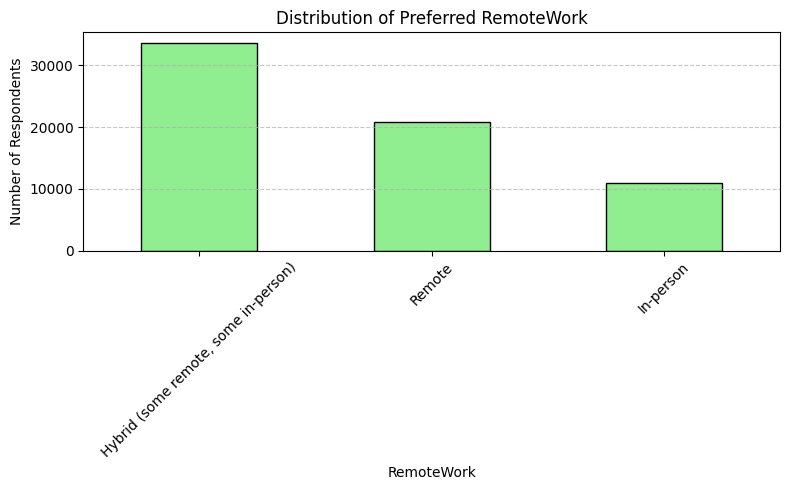

In [67]:
query = """
SELECT RemoteWork
FROM main
WHERE RemoteWork IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 2: Count occurrences of each category
arrangement_counts = df["RemoteWork"].value_counts()

# Step 3: Plot the histogram (bar chart)
plt.figure(figsize=(8, 5))
arrangement_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribution of Preferred RemoteWork")
plt.xlabel("RemoteWork")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data


** Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


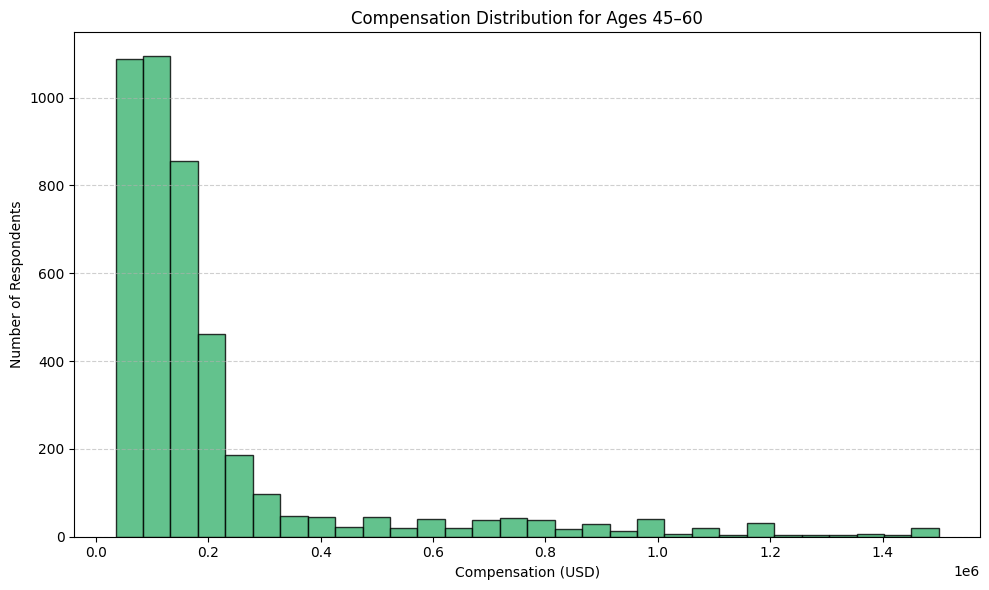

In [68]:
# Step 1: Load Age and CompTotal
query = """
SELECT Age, CompTotal
FROM main
"""
df = pd.read_sql_query(query, conn)

# Step 2: Convert CompTotal to numeric, drop nulls
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["Age", "CompTotal"])

# Step 3: Filter for string age groups representing 45–60
mid_career_ages = ["45-54 years old", "55-64 years old"]
df_mid = df[df["Age"].isin(mid_career_ages)]

# Step 4: Remove outliers (bottom 1% and top 1%)
lower = df_mid["CompTotal"].quantile(0.05)
upper = df_mid["CompTotal"].quantile(0.95)
df_mid = df_mid[(df_mid["CompTotal"] >= lower) & (df_mid["CompTotal"] <= upper)]

# Step 5: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_mid["CompTotal"], bins=30, color="mediumseagreen", edgecolor="black", alpha=0.8)
plt.title("Compensation Distribution for Ages 45–60")
plt.xlabel("Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


** Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


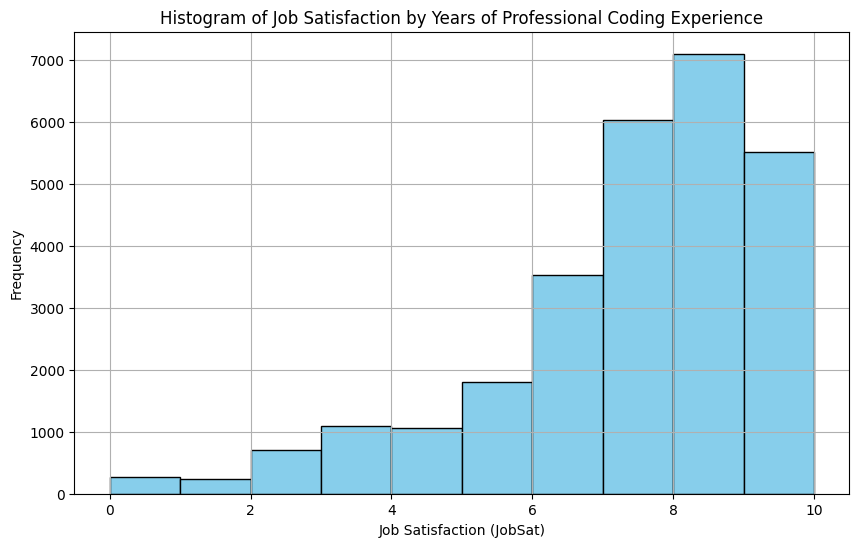

In [69]:
query = """
SELECT JobSat, YearsCodePro
FROM main
"""
df = pd.read_sql_query(query, conn)
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['JobSat', 'YearsCodePro'])

df['JobSat'].unique()

# Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Remove outliers (top and bottom 1%) for YearsCodePro
lower_bound = df["YearsCodePro"].quantile(0.01)
upper_bound = df["YearsCodePro"].quantile(0.99)
df = df[(df["YearsCodePro"] >= lower_bound) & (df["YearsCodePro"] <= upper_bound)]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(df['JobSat'], bins=10, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.xlabel('Job Satisfaction (JobSat)')
plt.ylabel('Frequency')
plt.title('Histogram of Job Satisfaction by Years of Professional Coding Experience')
plt.grid(True)
plt.show()


# **Box Plots**


** Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [70]:
# Step 1: Load age data
query = """
SELECT Age
FROM main
"""
df = pd.read_sql_query(query, conn)
df.head()

Age
0  Under 18 years old
1     35-44 years old
2     45-54 years old
3     18-24 years old
4     18-24 years old

In [71]:
import numpy as np
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan

    # Handle "Under X" cases (already working for you)
    if "Under" in age_str:
        return int(round(float(age_str.split()[1])-6))  # "12"

    # Handle exact numbers (e.g., "55 years old")
    if age_str[0].isdigit() and "-" not in age_str:
        return int(round(float(age_str.split()[0])))  # "55 years old" → 55

    # Handle ranges (e.g., "18-24 years old")
    if "-" in age_str:
        parts = age_str.split("-")
        lower = float(parts[0])  # "18" from "18-24"
        upper = float(parts[1].split()[0])  # "24" from "24 years old"
        return int(round((lower + upper) / 2))

    # Handle "Over X" cases (if they exist)
    if "Over" in age_str:
        return int(round(float(age_str.split()[1])+6))  # "61"

    return np.nan  # Fallback for unexpected formats
df = df.dropna(subset=["Age"])
df['Age_Midpoint'] = df['Age'].apply(age_to_midpoint)
df = df.dropna(subset=["Age_Midpoint"])
df['Age_int'] = df['Age_Midpoint'].round().astype(int)

<ipython-input-71-997544a801a3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_int'] = df['Age_Midpoint'].round().astype(int)


<ipython-input-72-68ea70989b9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_int"] = pd.to_numeric(df["Age_int"], errors="coerce")


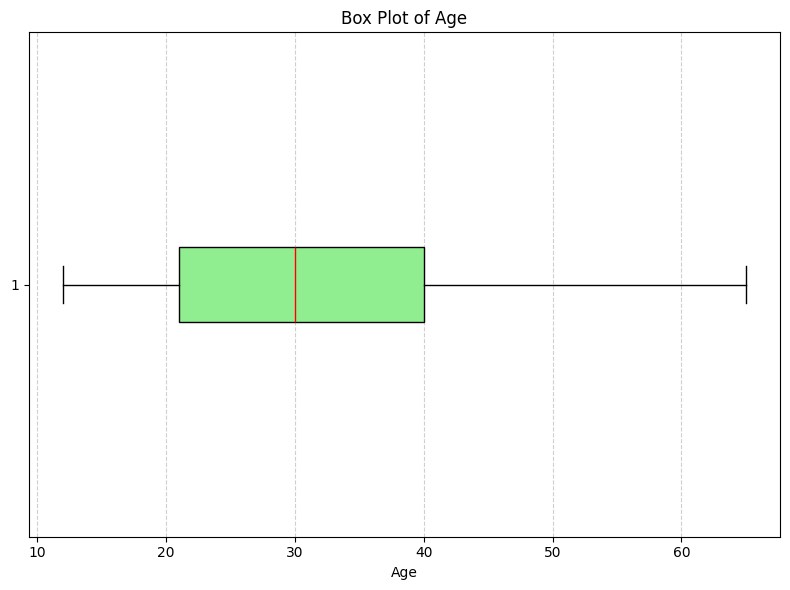

In [72]:
# Step 2: Convert Age to numeric, handling errors
df["Age_int"] = pd.to_numeric(df["Age_int"], errors="coerce")

# Step 3: Drop rows with NaN values in the 'Age' column
df = df.dropna(subset=["Age_int"])

# Step 4: Filter out ages outside the realistic range (e.g., 15-100)
df = df[(df["Age_int"] >= 11) & (df["Age_int"] <= 100)]

# Step 5: Create the box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df["Age_int"], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='gray', marker='o', markersize=5, linestyle='none'))

plt.xlabel("Age")
plt.title("Box Plot of Age")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Close the database connection


Once you've done querying , make sure to close the connection to the SQLite database:



In [73]:
conn.close()

# **Reload the saved CSV into Dataframe**


In [74]:
#df = pd.read_csv('survey-data.csv')
df = pd.read_csv('survey_data.csv')
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

In [75]:
df.head()

ResponseId                          Region                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment                            RemoteWork   Check  \
0  Employed, full-time                                Remote  Apples   
1  Employed, full-time                                Remote  Apples   
2  Employed, full-time                                Remote  Apples   
3   Student, full-time  Hybrid (some remote, some in-person)  Apples   
4   Student, full-time  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                              ffill   
4                                              ffill   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  \
0                                                NaN   
1  Technical documentation;Blogs;Books;Written Tu...   
2  Technical documentation;Blogs;Books;Written Tu...   
3  Stack Overflow;How-to videos;Interactive tutorial   
4  Technical documentation;Blogs;Written Tutorial...   

                                             TechDoc YearsCode YearsCodePro  \
0                                                NaN       NaN          NaN   
1  API document(s) and/or SDK document(s);User gu...        20           17   
2  API document(s) and/or SDK document(s);User gu...        37           27   
3                                                NaN         4          NaN   
4  API document(s) and/or SDK document(s);User gu...         9          NaN   

                 DevType OrgSize PurchaseInfluence BuyNewTool BuildvsBuy  \
0                    NaN     NaN               NaN        NaN        NaN   
1  Developer, full-stack     NaN               NaN        NaN        NaN   
2   Developer Experience     NaN               NaN        NaN        NaN   
3  Developer, full-stack     NaN               NaN        NaN        NaN   
4  Developer, full-stack     NaN               NaN        NaN        NaN   

  TechEndorse                                            Country Currency  \
0         NaN                           United States of America      NaN   
1         NaN  United Kingdom of Great Britain and Northern I...      NaN   
2         NaN  United Kingdom of Great Britain and Northern I...      NaN   
3         NaN                                             Canada      NaN   
4         NaN                                             Norway      NaN   

   CompTotal                             LanguageHaveWorkedWith  \
0        NaN                                                NaN   
1        NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2        NaN                                                 C#   
3        NaN  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4        NaN            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

         

# **Scatter Plot**


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [76]:
# Convert YearsCodePro to numeric, handling errors and special values
def convert_years_code(value):
    if pd.isna(value):
        return np.nan
    if value == "Less than 1 year":
        return 0.5  # Representing less than a year as 0.5
    elif value == "More than 50 years":
        return 51 # Handling "More than 50 years"
    else:
      try:
        return float(value)
      except:
        return np.nan

df['YearsCodePro'] = df['YearsCodePro'].apply(convert_years_code)
df.dropna(subset=['YearsCodePro'], inplace=True)

In [77]:
df['YearsCodePro'].unique()

array([17. , 27. ,  7. , 11. , 25. , 12. , 10. ,  3. ,  0.5, 18. , 37. ,
       15. , 20. ,  6. ,  2. , 16. ,  8. , 14. ,  4. , 45. ,  1. , 24. ,
       29. ,  5. , 30. , 26. ,  9. , 33. , 13. , 35. , 23. , 22. , 31. ,
       19. , 21. , 28. , 34. , 32. , 40. , 50. , 39. , 44. , 42. , 41. ,
       36. , 38. , 51. , 43. , 47. , 48. , 46. , 49. ])

In [78]:
import numpy as np
def age_to_midpoint(age_str):
    if pd.isna(age_str):
        return np.nan

    # Handle "Under X" cases (already working for you)
    if "Under" in age_str:
        return int(round(float(age_str.split()[1])-6))  # "12"

    # Handle exact numbers (e.g., "55 years old")
    if age_str[0].isdigit() and "-" not in age_str:
        return int(round(float(age_str.split()[0])))  # "55 years old" → 55

    # Handle ranges (e.g., "18-24 years old")
    if "-" in age_str:
        parts = age_str.split("-")
        lower = float(parts[0])  # "18" from "18-24"
        upper = float(parts[1].split()[0])  # "24" from "24 years old"
        return int(round((lower + upper) / 2))

    # Handle "Over X" cases (if they exist)
    if "Over" in age_str:
        return int(round(float(age_str.split()[1])+6))  # "61"

    return np.nan  # Fallback for unexpected formats
df = df.dropna(subset=["Age"])
df['Age_Midpoint'] = df['Age'].apply(age_to_midpoint)
df = df.dropna(subset=["Age_Midpoint"])
df['Age_int'] = df['Age_Midpoint'].round().astype(int)

<ipython-input-78-997544a801a3>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_int'] = df['Age_Midpoint'].round().astype(int)


<ipython-input-79-cac5f70c8e79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_int"] = pd.to_numeric(df["Age_int"], errors="coerce")


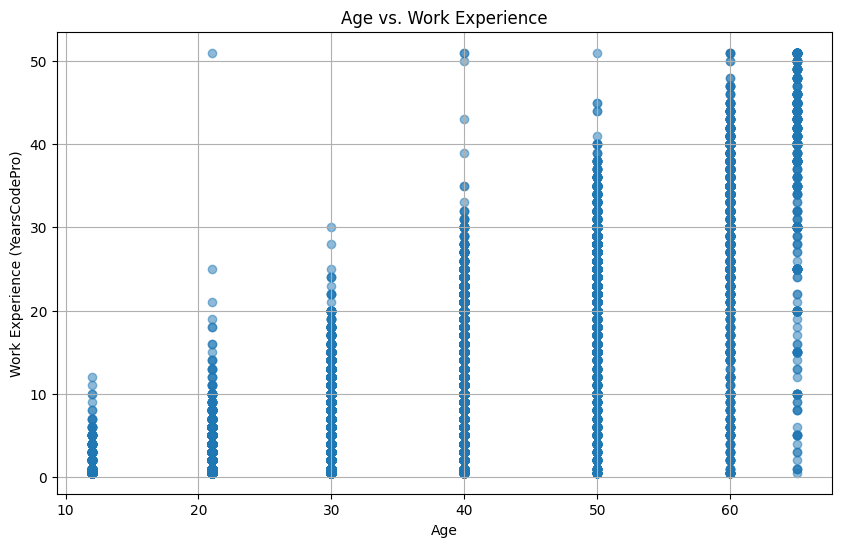

In [79]:
# Step 2: Convert Age to numeric, handling errors
df["Age_int"] = pd.to_numeric(df["Age_int"], errors="coerce")

# Step 3: Drop rows with NaN values in the 'Age' column
df = df.dropna(subset=["Age_int"])

# Step 4: Filter out ages outside the realistic range (e.g., 15-100)
df = df[(df["Age_int"] >= 11) & (df["Age_int"] <= 100)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age_int'], df['YearsCodePro'], alpha=0.5)
plt.title('Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()

#### Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


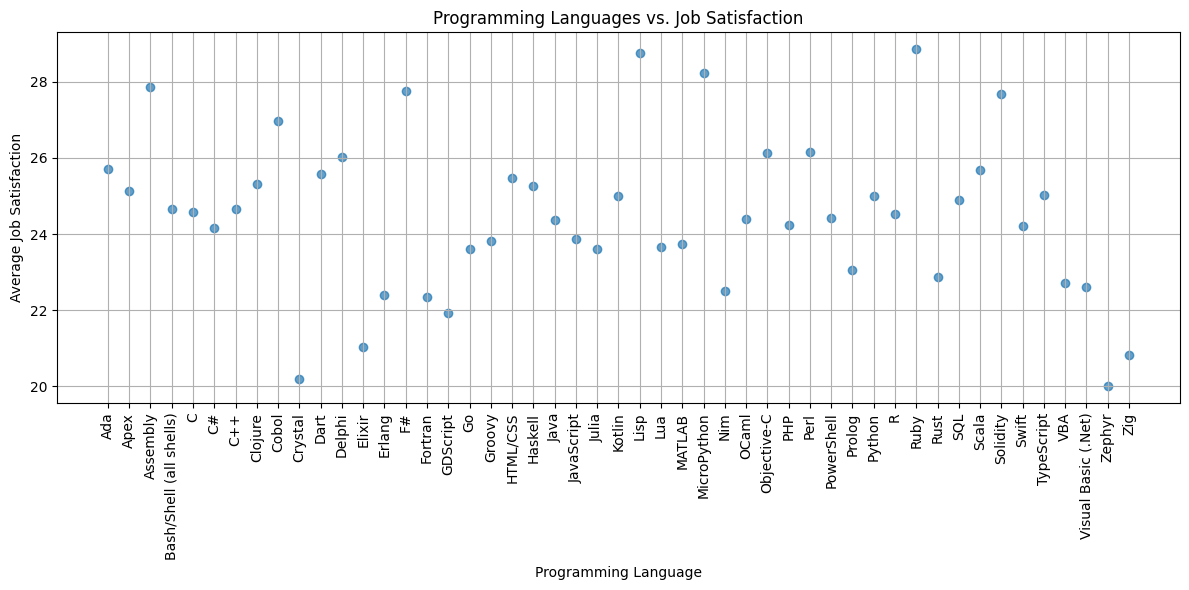

In [80]:
# Explode the LanguageHaveWorkedWith column
languages_df = df['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True).rename('Language').reset_index()

# Merge the exploded languages back with the original dataframe
merged_df = pd.merge(languages_df, df, left_index=True, right_index=True)

# Group data by language and calculate mean job satisfaction
language_satisfaction = merged_df.groupby('Language')['JobSatPoints_6'].mean().reset_index()


# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(language_satisfaction['Language'], language_satisfaction['JobSatPoints_6'], alpha=0.7)

plt.title('Programming Languages vs. Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


#### Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



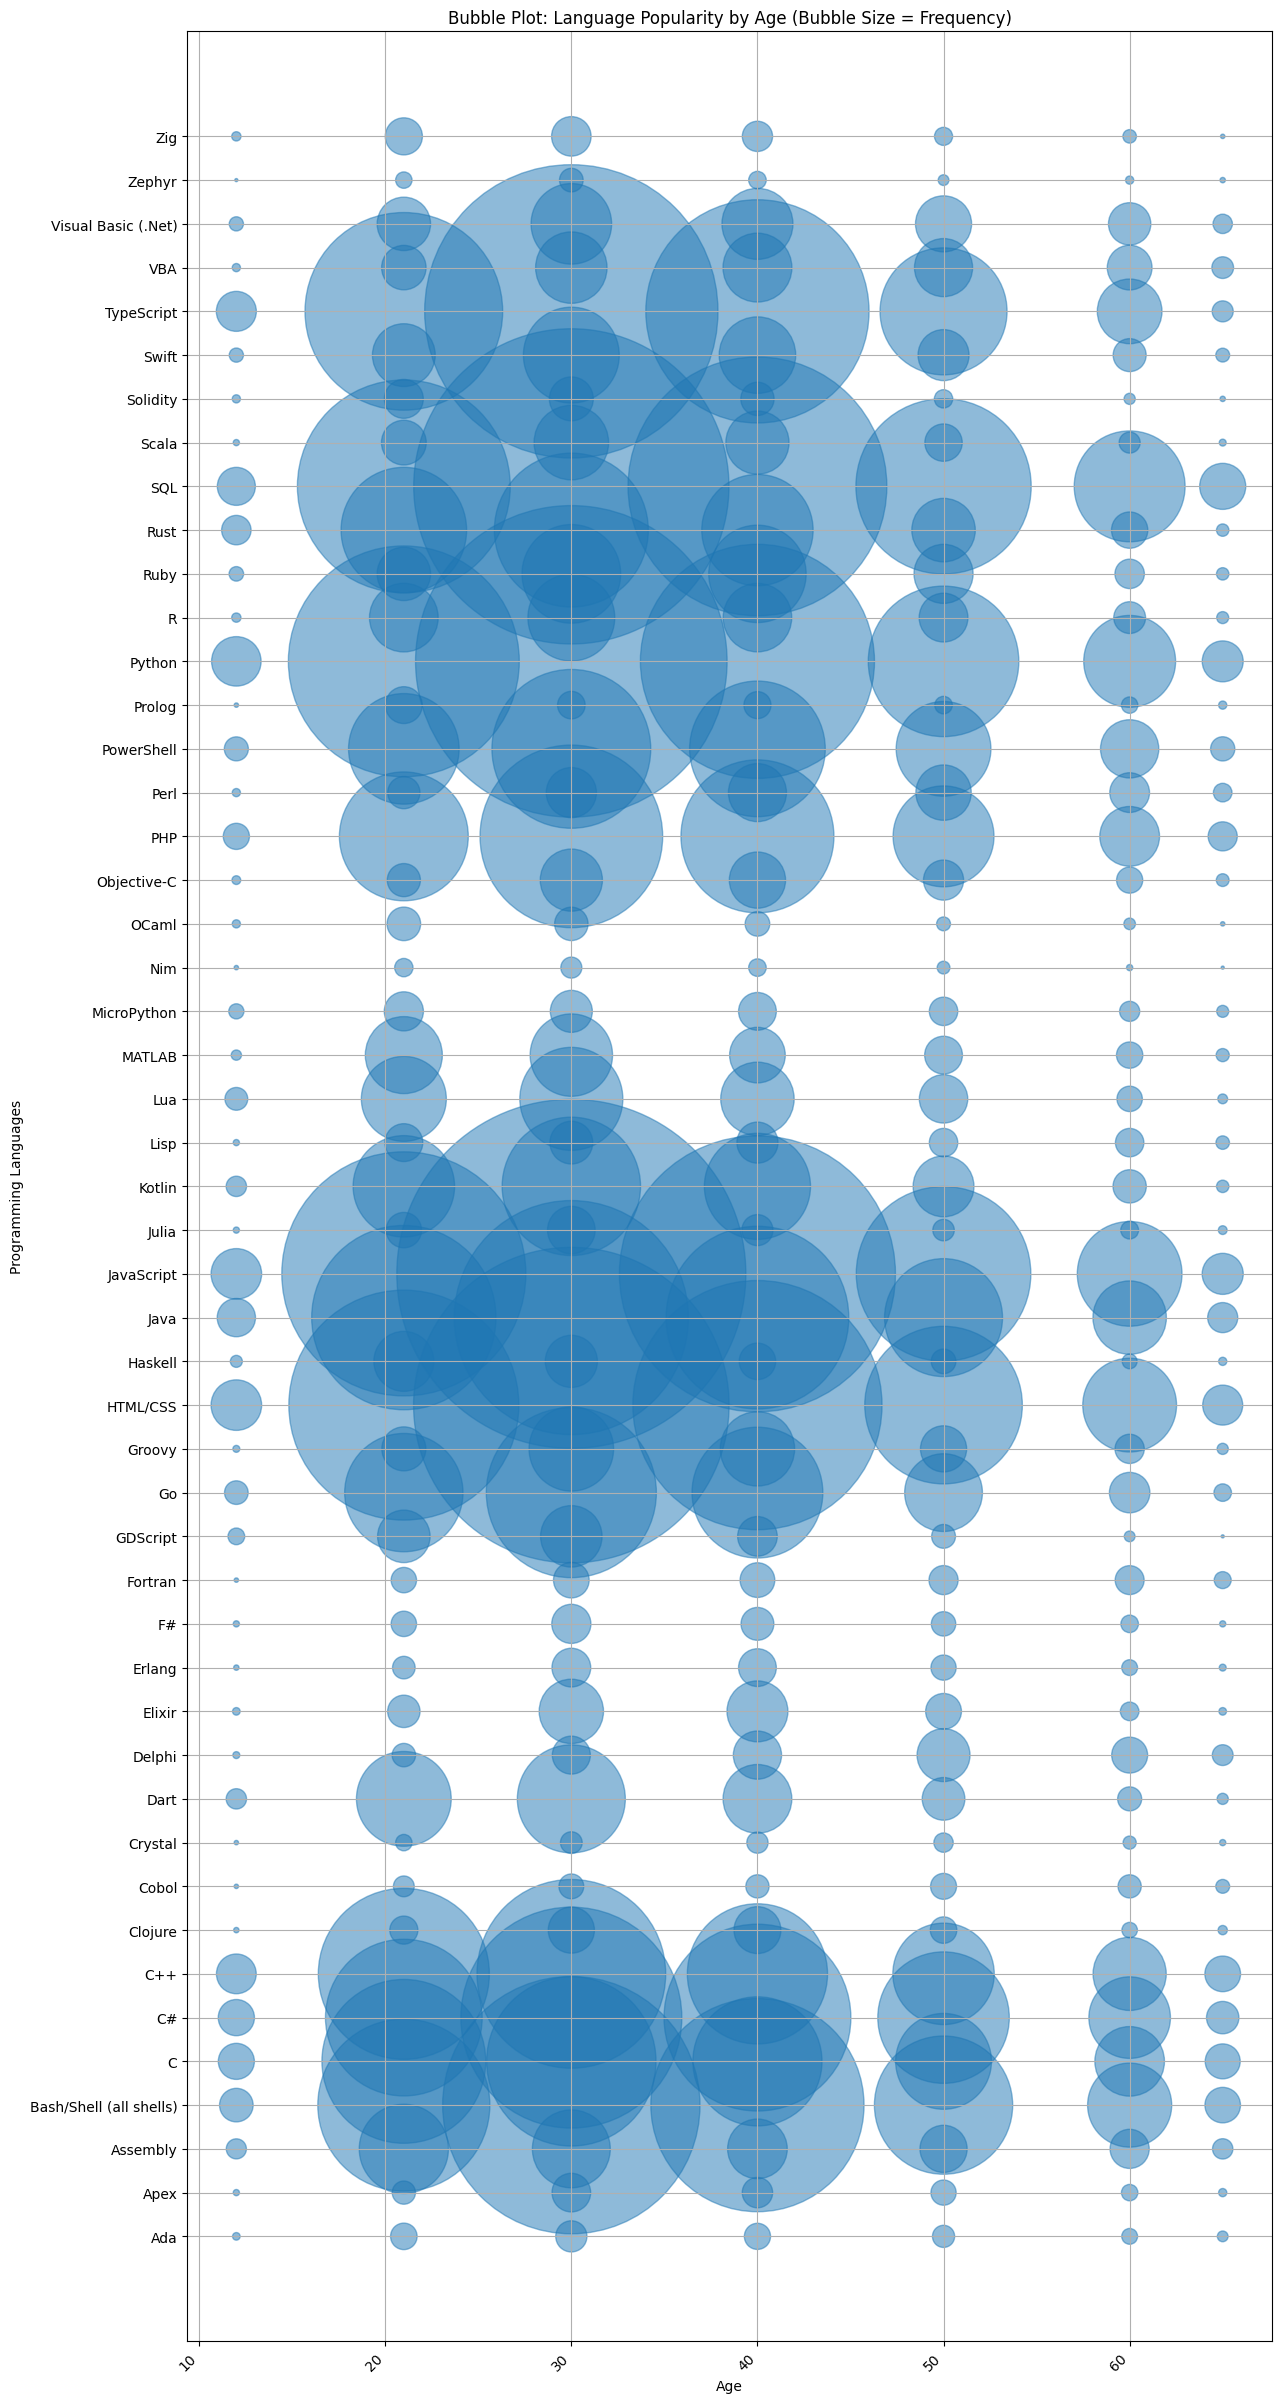

In [81]:
# Function to explode the 'LanguageHaveWorkedWith' column
def explode_languages(df):
    temp_df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    temp_df['LanguageHaveWorkedWith'] = temp_df['LanguageHaveWorkedWith'].str.split(';')
    temp_df = temp_df.explode('LanguageHaveWorkedWith')
    return temp_df

# Explode the 'LanguageHaveWorkedWith' column in the DataFrame
exploded_df = explode_languages(df)


language_counts = exploded_df.groupby(['Age_int', 'LanguageHaveWorkedWith']).size().reset_index(name='Counts')

plt.figure(figsize=(14, 30))
plt.scatter(language_counts['Age_int'], language_counts['LanguageHaveWorkedWith'], s=language_counts['Counts'] * 5, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Programming Languages')
plt.title('Bubble Plot: Language Popularity by Age (Bubble Size = Frequency)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


### Visualizing Data Composition with Pie Charts


##### Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



In [82]:
# prompt: Visualizing Data Composition with Pie Charts
# 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With
# In the survey data, the DatabaseWantToWorkWith column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.

# Count the occurrences of each database
database_counts = df['DatabaseWantToWorkWith'].value_counts()

# Get the top 5 databases
top_5_databases = database_counts.head(5)

top_5_databases.unique()

array([3347, 1341, 1335, 1162,  839])

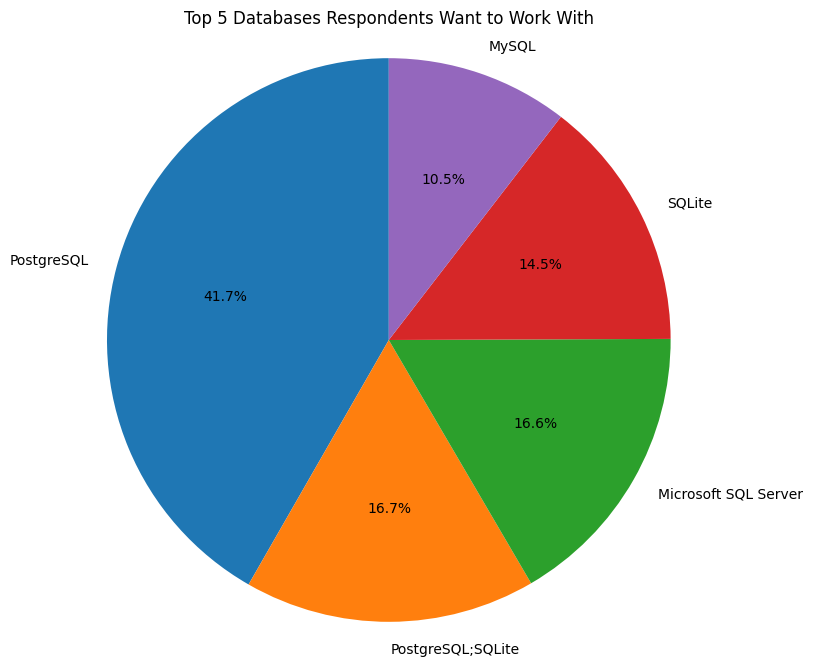

In [83]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



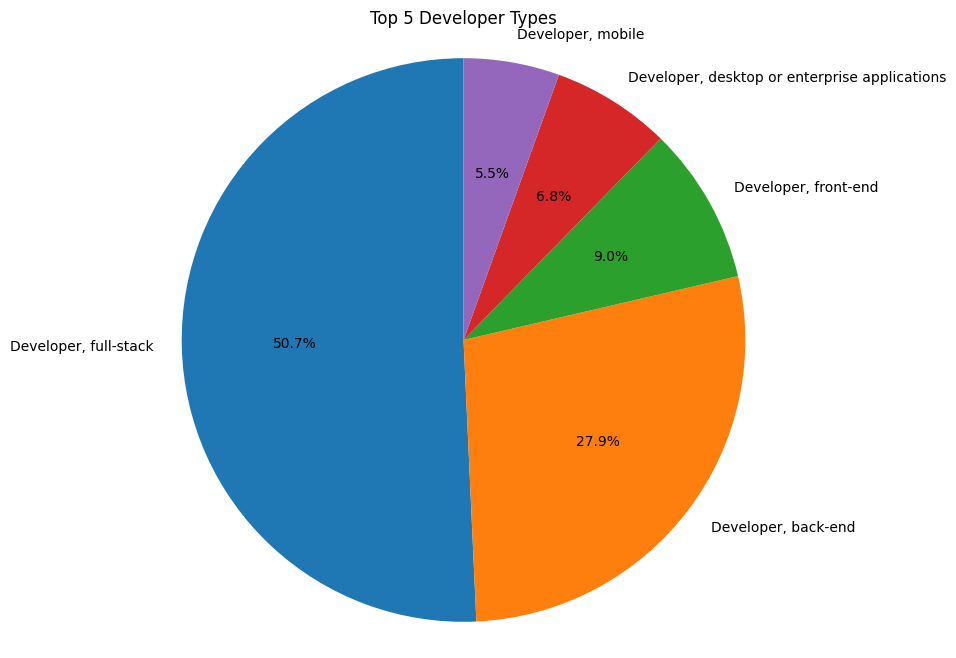

In [84]:
# prompt: The DevType column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.

# Count the occurrences of each developer type
dev_type_counts = df['DevType'].value_counts()

# Get the top 5 developer types
top_5_dev_types = dev_type_counts.head(5)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_dev_types, labels=top_5_dev_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Developer Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


##### Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



In [85]:
# Check existing column names
df.columns

Index(['ResponseId', 'Region', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Age_Midpoint', 'ConvertedCompYearly_MinMax',
       'ConvertedCompYearly_Zscore', 'ExperienceRange', 'Age_int'],
      dtype='object', length=119)

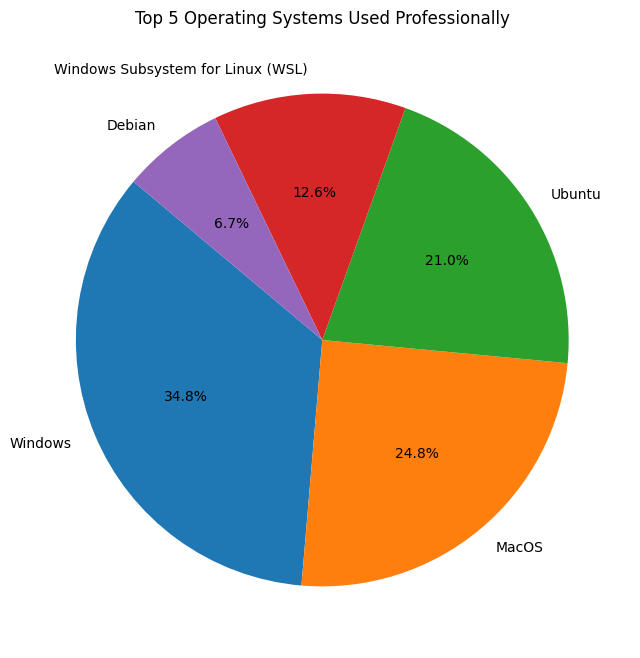

In [86]:
# Create a simplified alias (optional, but makes code cleaner)
df['OpSysProfessional'] = df["OpSysProfessional use"]

# Prepare data for pie chart
op_sys_series = df['OpSysProfessional'].dropna().str.split(';').explode()
op_sys_counts = op_sys_series.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
op_sys_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Operating Systems Used Professionally")
plt.ylabel('')
plt.show()

##### Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



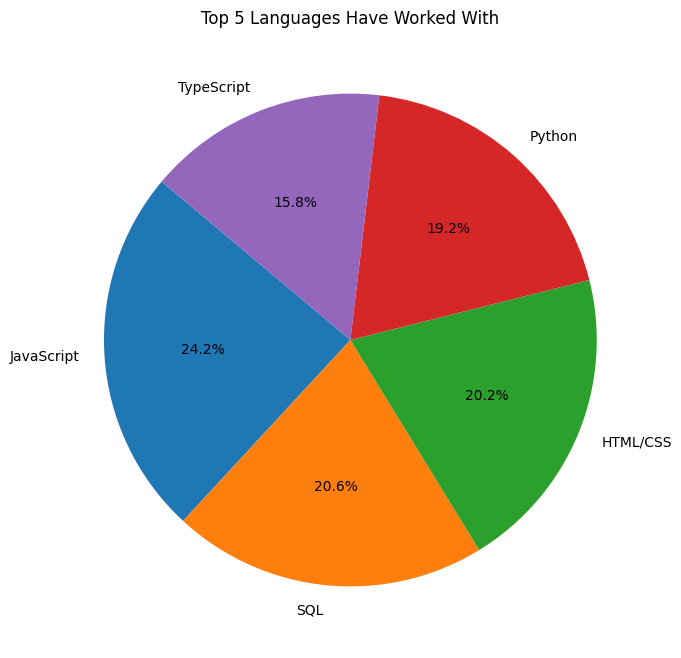

In [87]:
##Write your code here
lang_series = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
lang_counts = lang_series.value_counts().head(5)

plt.figure(figsize=(8, 8))
lang_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Languages Have Worked With")
plt.ylabel('')
plt.show()

##### Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



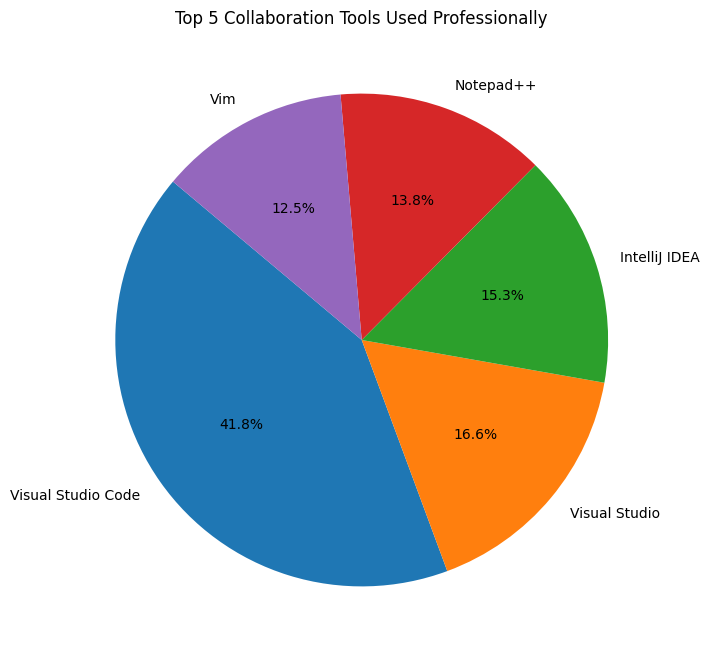

In [88]:
##Write your code here
collab_series = df['NEWCollabToolsHaveWorkedWith'].dropna().str.split(';').explode()
collab_counts = collab_series.value_counts().head(5)

plt.figure(figsize=(8, 8))
collab_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Collaboration Tools Used Professionally")
plt.ylabel('')
plt.show()

##### Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



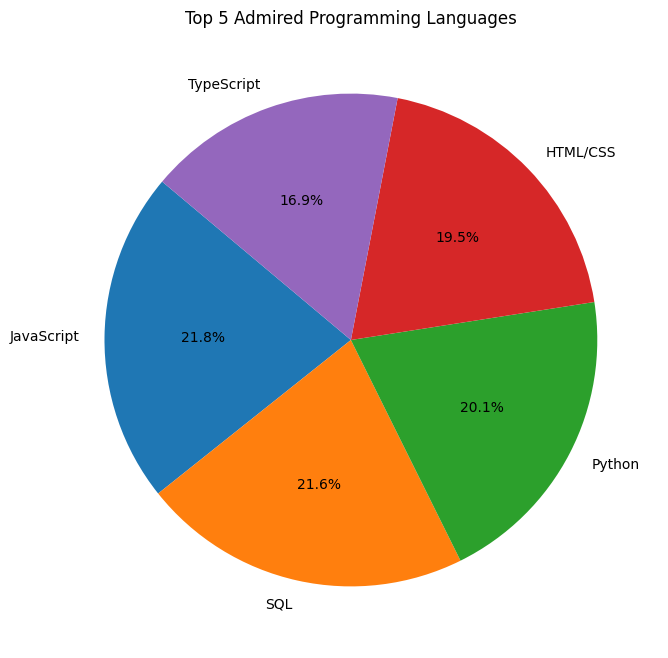

In [89]:

admired_series = df['LanguageAdmired'].dropna().str.split(';').explode()
admired_counts = admired_series.value_counts().head(5)

plt.figure(figsize=(8, 8))
admired_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Admired Programming Languages")
plt.ylabel('')
plt.show()

##### Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



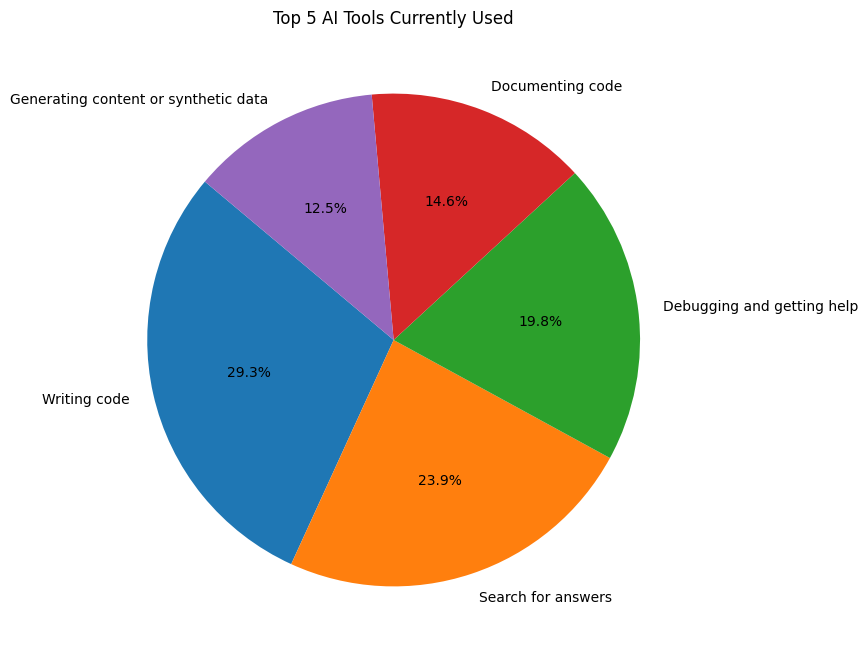

In [90]:
# Use the exact column name with brackets
ai_series = df['AIToolCurrently Using'].dropna().str.split(';').explode()
ai_counts = ai_series.value_counts().head(5)

plt.figure(figsize=(8, 8))
ai_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 AI Tools Currently Used")
plt.ylabel('')
plt.show()

##### Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



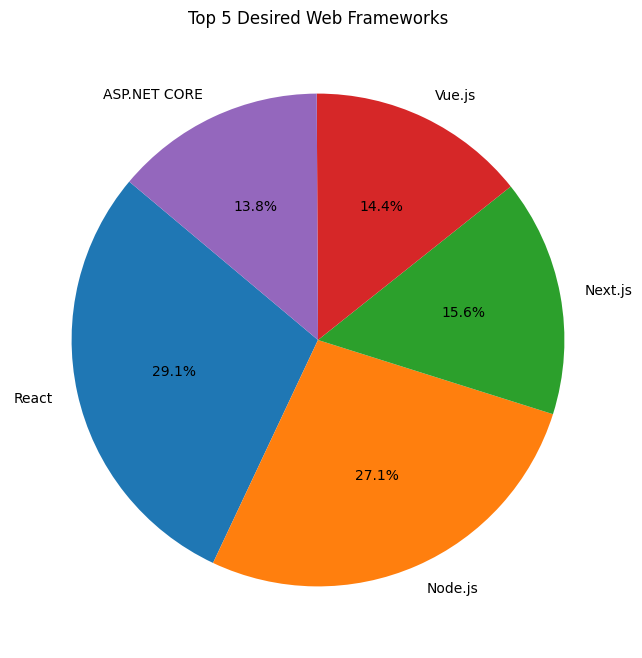

In [91]:
##Write your code here
webframe_series = df['WebframeWantToWorkWith'].dropna().str.split(';').explode()
webframe_counts = webframe_series.value_counts().head(5)

plt.figure(figsize=(8, 8))
webframe_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Desired Web Frameworks")
plt.ylabel('')
plt.show()

##### Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



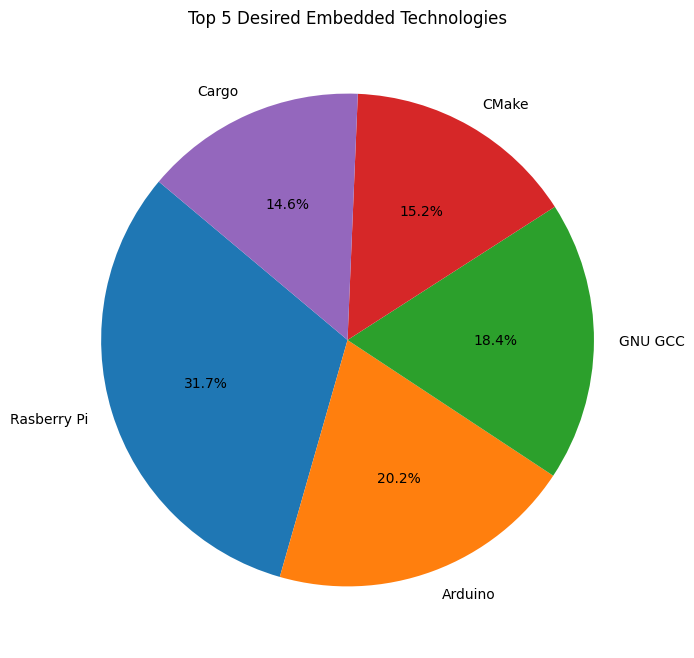

In [92]:
##Write your code here
embedded_series = df['EmbeddedWantToWorkWith'].dropna().str.split(';').explode()
embedded_counts = embedded_series.value_counts().head(5)

plt.figure(figsize=(8, 8))
embedded_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Desired Embedded Technologies")
plt.ylabel('')
plt.show()

# **Stacked Charts**


### Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



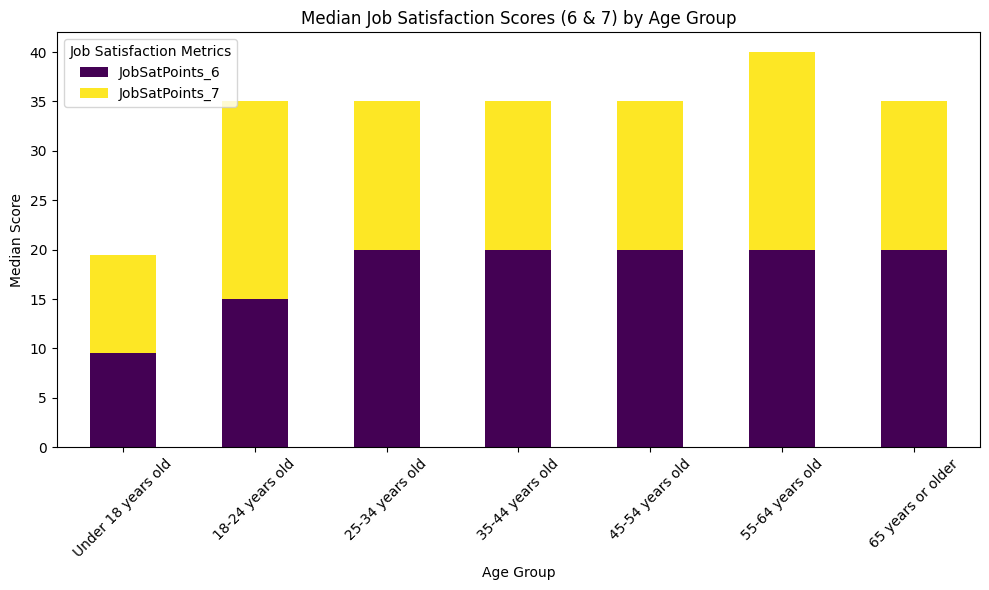

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Age and compute median of JobSatPoints_6 and JobSatPoints_7
median_satisfaction = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().loc[
    ['Under 18 years old', '18-24 years old', '25-34 years old',
     '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
]

# Plot stacked bar chart
median_satisfaction.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Median Job Satisfaction Scores (6 & 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Score')
plt.xticks(rotation=45)
plt.legend(title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


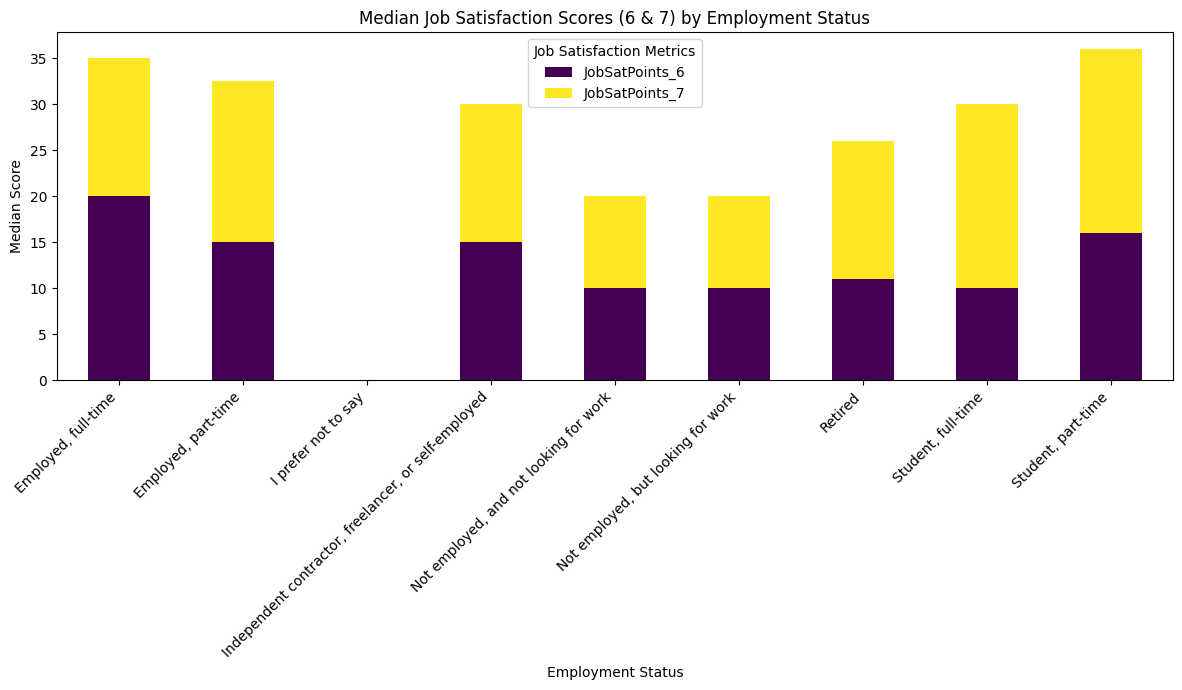

In [94]:
# prompt: split and explode Employment column

# Ensure 'Employment' is treated as a string
df['Employment'] = df['Employment'].astype(str)

# Split the 'Employment' column by semicolon and explode it
df_exploded = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')

# Group by the exploded Employment column and compute the median of the satisfaction points
median_satisfaction_employment = df_exploded.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plotting the stacked bar chart
median_satisfaction_employment.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Median Job Satisfaction Scores (6 & 7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Metrics')
plt.tight_layout()
plt.show()

##### Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


<ipython-input-95-6e6c9bdcb705>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


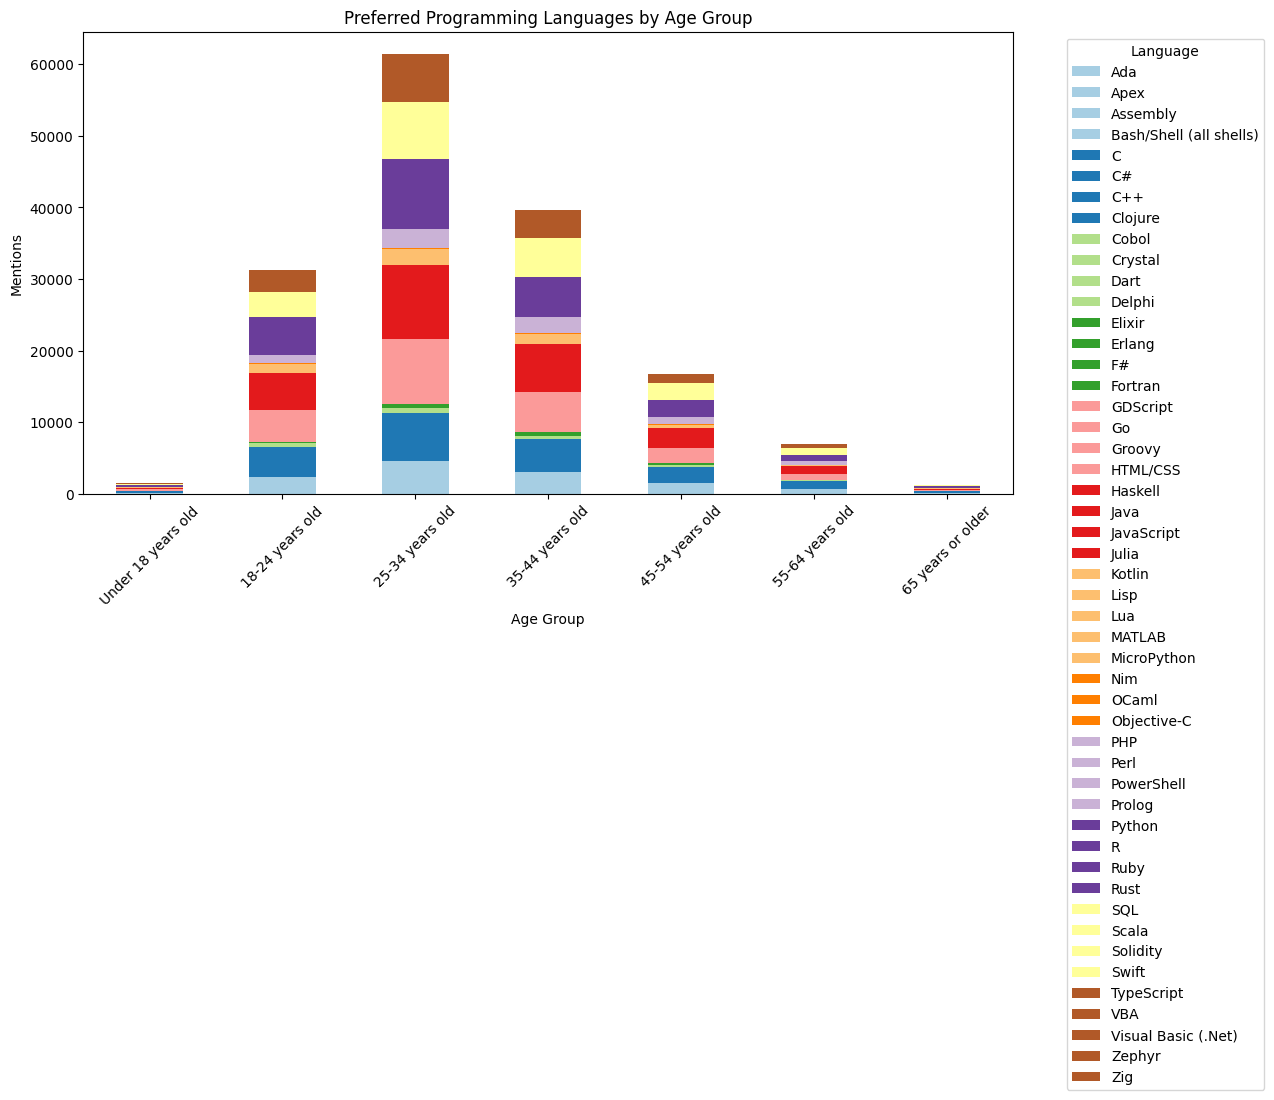

In [95]:
# Explode multi-select answers
lang_df = df[['Age', 'LanguageAdmired']].dropna()
lang_df['Language'] = lang_df['LanguageAdmired'].str.split(';')
lang_df = lang_df.explode('Language')

# Count and reshape
lang_counts = lang_df.groupby(['Age', 'Language']).size().unstack(fill_value=0).loc[
    ['Under 18 years old', '18-24 years old', '25-34 years old',
     '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
]

# Plot
lang_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Paired')
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mentions')
plt.xticks(rotation=45)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.


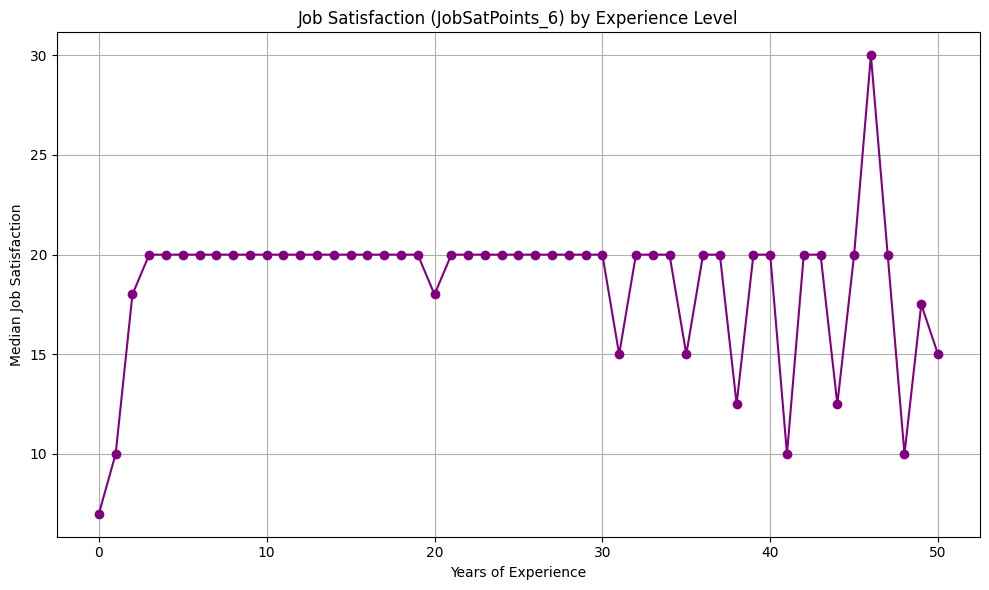

In [96]:
# Use WorkExp or similar experience-related column
if 'WorkExp' in df.columns:
    exp_sat = df.groupby('WorkExp')['JobSatPoints_6'].median().dropna()

    # Sort index (convert to numeric if needed)
    exp_sat.index = pd.to_numeric(exp_sat.index, errors='coerce')
    exp_sat = exp_sat.sort_index()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(exp_sat.index, exp_sat.values, marker='o', color='purple')
    plt.title('Job Satisfaction (JobSatPoints_6) by Experience Level')
    plt.xlabel('Years of Experience')
    plt.ylabel('Median Job Satisfaction')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Experience column (e.g., 'WorkExp') not found in dataset.")


# **Bar Charts**


##### Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



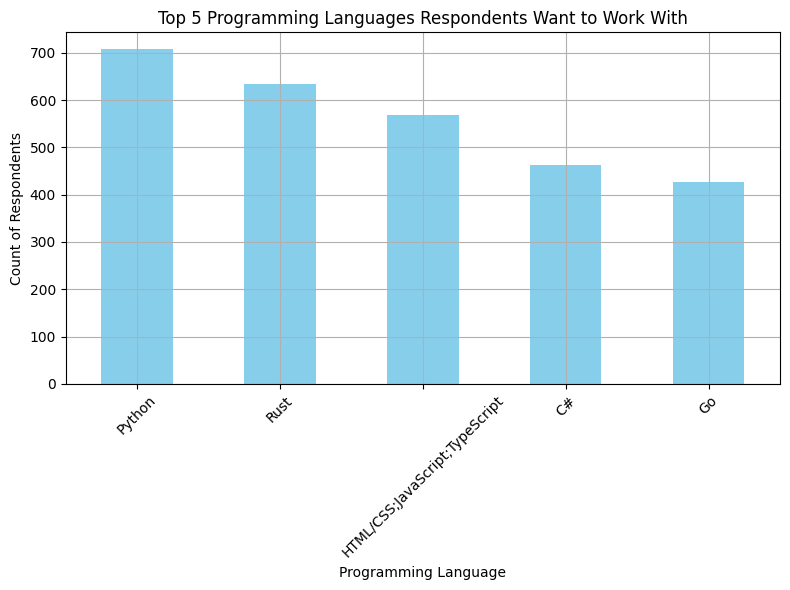

In [97]:
# Top 5 programming languages respondents want to work with
top_languages = df['LanguageWantToWorkWith'].value_counts().head(5)

plt.figure(figsize=(8, 6))
top_languages.plot(kind='bar', color='skyblue')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


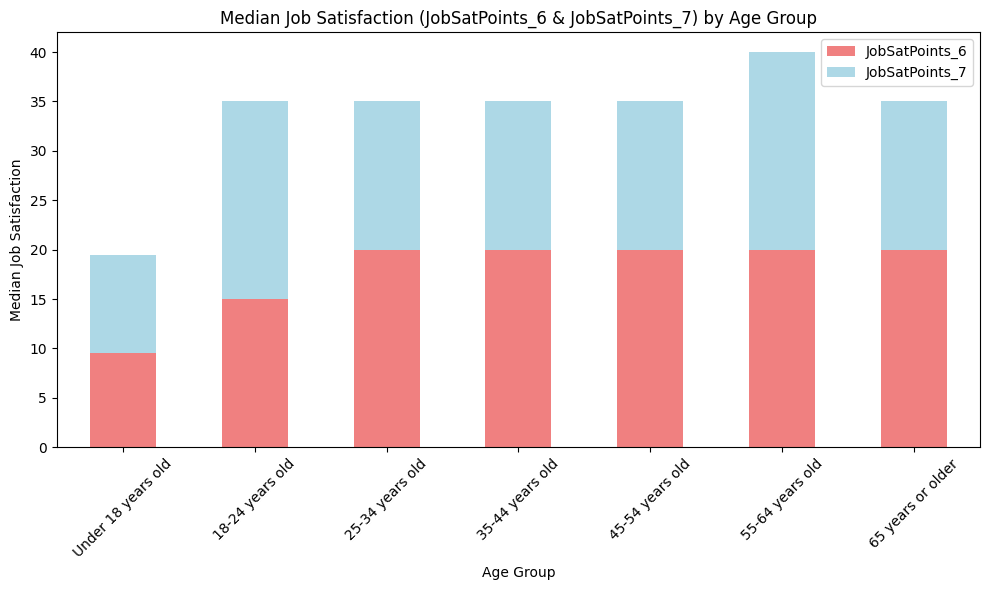

In [98]:
# Group by Age and calculate median for JobSatPoints_6 and JobSatPoints_7
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
job_sat = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median().loc[age_order]

# Plot stacked bar chart
job_sat.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightblue'])
plt.title('Median Job Satisfaction (JobSatPoints_6 & JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



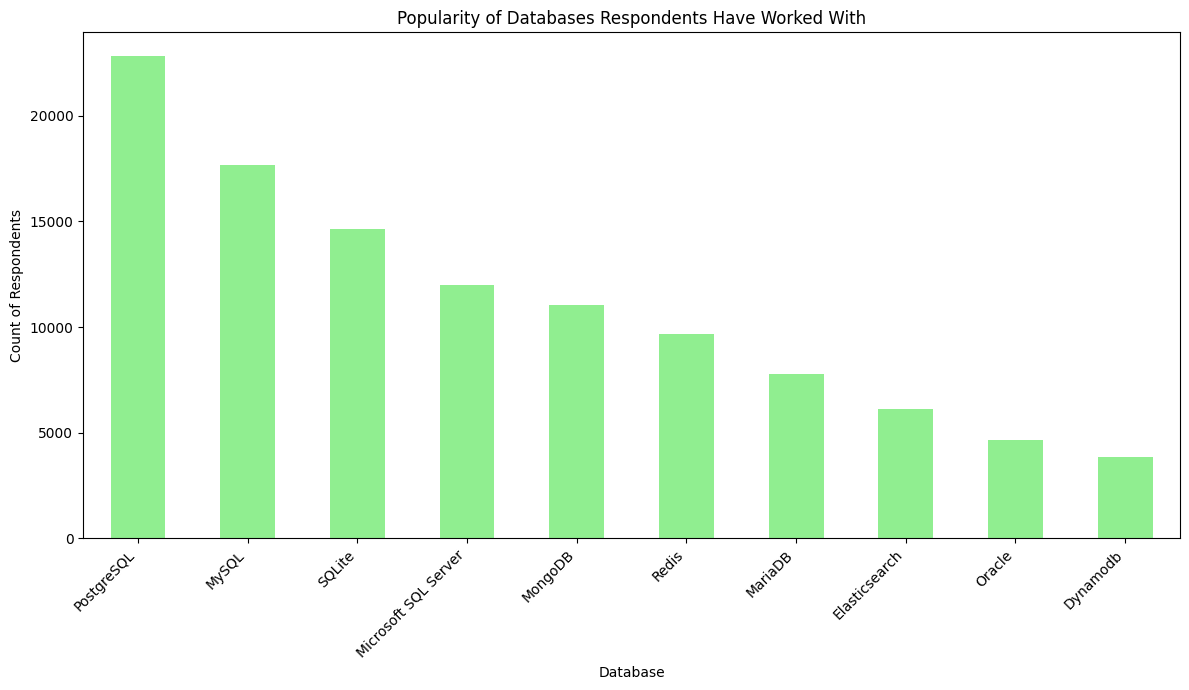

In [99]:
# prompt: first split and explode the DatabaseHaveWorkedWith column

# Split the string by semicolon and explode into multiple rows
database_counts = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each database
database_counts = database_counts.value_counts().head(10)

# Plot bar chart of database popularity
plt.figure(figsize=(12, 7))
database_counts.plot(kind='bar', color='lightgreen')
plt.title('Popularity of Databases Respondents Have Worked With')
plt.xlabel('Database')
plt.ylabel('Count of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



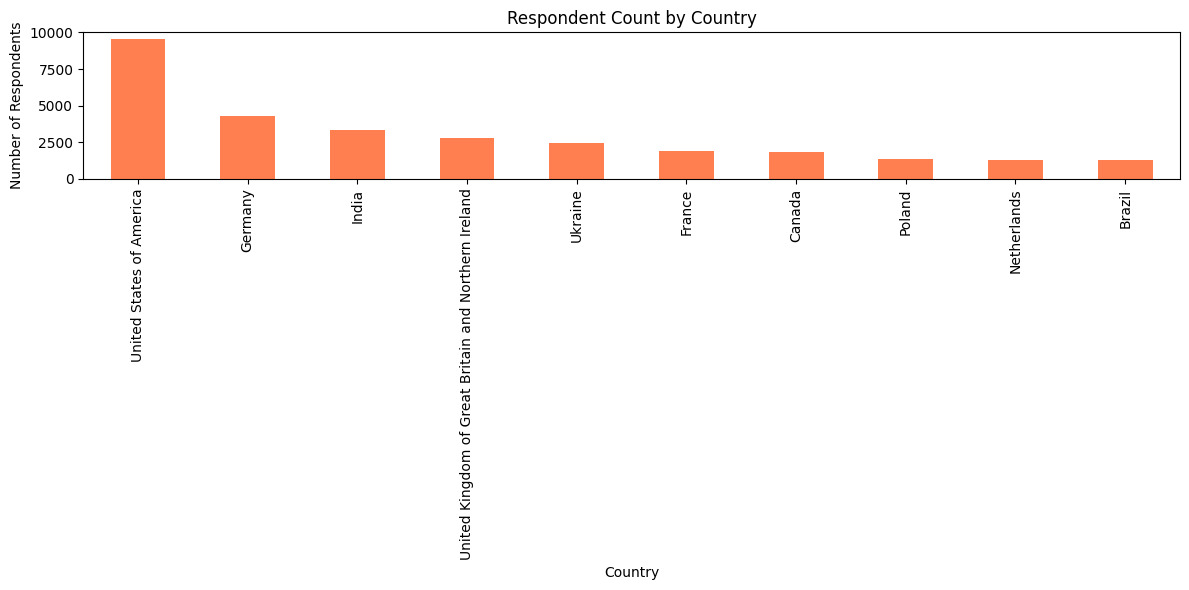

In [100]:
# Bar chart of respondent count by country
country_counts = df['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='coral')
plt.title('Respondent Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [101]:
df.to_csv('survey_data_updated.csv', index=False, na_rep='NA')

## 🧠 Key Insights

- **JavaScript**, **HTML/CSS**, and **SQL** are the most commonly used languages.
- **PostgreSQL** leads current and future database preferences.
- Most developers are aged **25–34** with **Bachelor’s or Master’s** degrees.
- Cloud technologies like **AWS** and **Azure** dominate both usage and aspiration.
